# **Transborder Freight Data Analysis**

**Client**: Bureau of Transportation Statistics (BTS)

**Analyst**: getINNOtized Team

**Project**: Uncovering inefficiencies and sustainability insights from U.S. transborder freight data

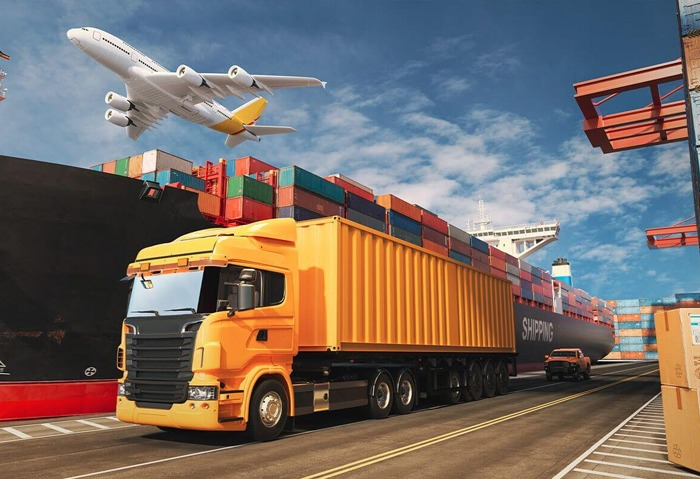

**Business Problem**

The U.S. transportation system is a complex, multimodal infrastructure that supports trade, commerce, and mobility. The BTS collects rich datasets on freight movement across road, rail, air, and maritime transport. However, growing concerns around system inefficiencies, environmental sustainability, and logistical bottlenecks necessitate data-driven insights to improve national transportation policy and infrastructure planning. This project analyses freight movement data from the U.S. Bureau of Transportation Statistics (BTS) to uncover insights on transportation efficiency, safety, and environmental sustainability. It is managed by the Data Analytics team at getINNOtized.


### Objectives
The main objective of this analysis is to identify inefficiencies in freight transport (e.g. congestion, delays), evaluate environmental impacts across transport modes and recommend data-driven solutions for system improvement. This analysis should be able to enhance:

- Efficiency of freight movement
- Safety and infrastructure use
- Environmental impact management
- Multimodal transportation planning


### Loading the necessary libraries

In [6]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

### Merging the dataset

In [9]:
# 🔹 1. Define your folder path (use raw string to avoid Windows escape errors)
csv_dir = r"C:\Users\Dell\OneDrive\Desktop\Project 1\Transborder Freight Project"

# 🔹 2. Get all .csv files in the folder
csv_files = [file for file in os.listdir(csv_dir) if file.endswith(".csv")]
print(f"🗂 Found {len(csv_files)} CSV files.")

# 🔹 3. Create a list to hold individual DataFrames
dataframes = []

# 🔹 4. Loop through files, read them, and append to the list
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    
    try:
        df = pd.read_csv(file_path)
        df['source_file'] = file  # Optional: Track which file each row came from
        dataframes.append(df)
        print(f"✅ Loaded: {file}")
    except Exception as e:
        print(f"⚠️ Could not read {file}: {e}")

# 🔹 5. Concatenate all loaded DataFrames
if dataframes:
    merged_df = pd.concat(dataframes, ignore_index=True)
    print(f"✅ Successfully merged {len(dataframes)} DataFrames.")
else:
    print("❌ No DataFrames loaded. Check file formats or folder path.")

# 🔹 6. (Optional) Preview and save the merged result
merged_df.head()  # Preview first 5 rows

# 🔹 7. Save to disk
output_path = os.path.join(csv_dir, "Transborder Freight Project.csv")
merged_df.to_csv(output_path, index=False)
print(f"📁 Merged CSV saved to: {output_path}")


🗂 Found 5 CSV files.
✅ Loaded: TFDA_2020_cleaned.csv
✅ Loaded: TFDA_2021_cleaned.csv
✅ Loaded: TFDA_2022_cleaned.csv
✅ Loaded: TFDA_2023_cleaned.csv
✅ Loaded: TFDA_2024_cleaned.csv
✅ Successfully merged 5 DataFrames.
📁 Merged CSV saved to: C:\Users\Dell\OneDrive\Desktop\Project 1\Transborder Freight Project\Transborder Freight Project.csv


In [11]:
# Use the same path you saved to
merged_path = r"C:\Users\Dell\OneDrive\Desktop\Project 1\Transborder Freight Project\Transborder Freight Project.csv"

# Load the CSV into a new DataFrame
TFDA = pd.read_csv(merged_path)

# Preview the first 5 rows
TFDA.head()


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,source_file
0,1,AK,0,5,BC,OT,2010,34800,0,0,1,0,1.0,2020.0,2,TFDA_2020_cleaned.csv
1,1,AK,0,5,CM,OT,2010,36055,0,0,1,0,1.0,2020.0,2,TFDA_2020_cleaned.csv
2,1,AK,0,3,OT,XQ,1220,2979,236,40,1,X,1.0,2020.0,3,TFDA_2020_cleaned.csv
3,1,AK,0,5,OT,XC,1220,678610,0,13524,1,X,1.0,2020.0,3,TFDA_2020_cleaned.csv
4,1,AK,0,5,OT,XC,1220,53448,0,732,2,X,1.0,2020.0,3,TFDA_2020_cleaned.csv


### Understanding the dataset

In [14]:
# Quick overview
TFDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24869580 entries, 0 to 24869579
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               int64  
 11  CONTCODE         object 
 12  MONTH            float64
 13  YEAR             float64
 14  COMMODITY2       int64  
 15  source_file      object 
dtypes: float64(2), int64(8), object(6)
memory usage: 3.0+ GB


In [16]:
# checking the shape of the dataset
TFDA.shape

(24869580, 16)

In [18]:
# checking the various columns
TFDA.columns

Index(['TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'MEXSTATE', 'CANPROV',
       'COUNTRY', 'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 'CONTCODE',
       'MONTH', 'YEAR', 'COMMODITY2', 'source_file'],
      dtype='object')

In [20]:
TFDA.dtypes

TRDTYPE              int64
USASTATE            object
DEPE                object
DISAGMOT             int64
MEXSTATE            object
CANPROV             object
COUNTRY              int64
VALUE                int64
SHIPWT               int64
FREIGHT_CHARGES      int64
DF                   int64
CONTCODE            object
MONTH              float64
YEAR               float64
COMMODITY2           int64
source_file         object
dtype: object

### Data Cleaning 

In [23]:
TFDA.duplicated().sum()

19037063

In [25]:
# Dropping duplicates 
# reset_index to reset the index after removing duplicates
TFDA.drop_duplicates(inplace=True)
TFDA.reset_index(drop=True)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,source_file
0,1,AK,0,5,BC,OT,2010,34800,0,0,1,0,1.0,2020.0,2,TFDA_2020_cleaned.csv
1,1,AK,0,5,CM,OT,2010,36055,0,0,1,0,1.0,2020.0,2,TFDA_2020_cleaned.csv
2,1,AK,0,3,OT,XQ,1220,2979,236,40,1,X,1.0,2020.0,3,TFDA_2020_cleaned.csv
3,1,AK,0,5,OT,XC,1220,678610,0,13524,1,X,1.0,2020.0,3,TFDA_2020_cleaned.csv
4,1,AK,0,5,OT,XC,1220,53448,0,732,2,X,1.0,2020.0,3,TFDA_2020_cleaned.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832512,2,UNKNOWN,55XX,5,OT,OT,1220,4384342,7399,1883,0,0,9.0,2024.0,98,TFDA_2024_cleaned.csv
5832513,2,UNKNOWN,55XX,8,OT,OT,1220,50211,6350,3500,0,0,9.0,2024.0,98,TFDA_2024_cleaned.csv
5832514,2,UNKNOWN,60XX,8,OT,OT,1220,793390,80,500,0,0,9.0,2024.0,89,TFDA_2024_cleaned.csv
5832515,2,UNKNOWN,70XX,8,OT,OT,1220,233990301,0,0,0,0,9.0,2024.0,99,TFDA_2024_cleaned.csv


In [27]:
# checking for NaNs in the dataset
TFDA.isnull().sum()

TRDTYPE            0
USASTATE           0
DEPE               0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               1
COMMODITY2         0
source_file        0
dtype: int64

In [29]:
# Find the row with missing YEAR and confirm it
missing_year_row = TFDA[TFDA['YEAR'].isnull()]
print(missing_year_row)

          TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
18504502        2  UNKNOWN  20XX         1       OT      OT     2010  1190539   

          SHIPWT  FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  COMMODITY2  \
18504502   57182            18997   0        1    7.0   NaN          84   

                    source_file  
18504502  TFDA_2022_cleaned.csv  


In [31]:
# Impute with 2022
TFDA.loc[TFDA['YEAR'].isnull(), 'YEAR'] = 2022

# Change YEAR column to integer
TFDA['YEAR'] = TFDA['YEAR'].astype(int)
TFDA['MONTH'] = TFDA['MONTH'].astype(int)

In [33]:
# cross checking for NaNs again in the dataset
TFDA.isnull().sum()

TRDTYPE            0
USASTATE           0
DEPE               0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
source_file        0
dtype: int64

In [35]:
TFDA.shape

(5832517, 16)

In [37]:
TFDA.to_csv("TFDA_cleaned.csv", index=False, encoding='utf-8-sig')

### **Exploratory Data Analysis**

In [39]:
# Summary statistics
TFDA.describe()

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR,COMMODITY2
count,5.832517e+06,5.832517e+06,5.832517e+06,5.832517e+06,5.832517e+06,5.832517e+06,5.832517e+06,5.832517e+06,5.832517e+06,5.832517e+06
mean,1.401877e+00,4.733874e+00,1.521267e+03,2.949880e+06,1.353223e+06,4.111276e+04,7.972167e-01,5.999320e+00,2.022034e+03,6.106349e+01
std,4.902775e-01,1.227718e+00,3.837175e+02,3.948557e+07,4.424154e+07,1.122525e+06,7.482317e-01,3.335058e+00,1.304655e+00,2.927942e+01
min,1.000000e+00,1.000000e+00,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.020000e+03,1.000000e+00
25%,1.000000e+00,5.000000e+00,1.220000e+03,1.395000e+04,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.021000e+03,3.600000e+01
50%,1.000000e+00,5.000000e+00,1.220000e+03,7.052200e+04,1.000000e+00,3.360000e+02,1.000000e+00,6.000000e+00,2.022000e+03,6.800000e+01
75%,2.000000e+00,5.000000e+00,2.010000e+03,4.230800e+05,6.737000e+03,3.221000e+03,1.000000e+00,9.000000e+00,2.023000e+03,8.700000e+01
max,2.000000e+00,9.000000e+00,2.010000e+03,5.595625e+09,9.068700e+09,2.487214e+08,2.000000e+00,1.200000e+01,2.024000e+03,9.900000e+01


**Checking for data distribution**

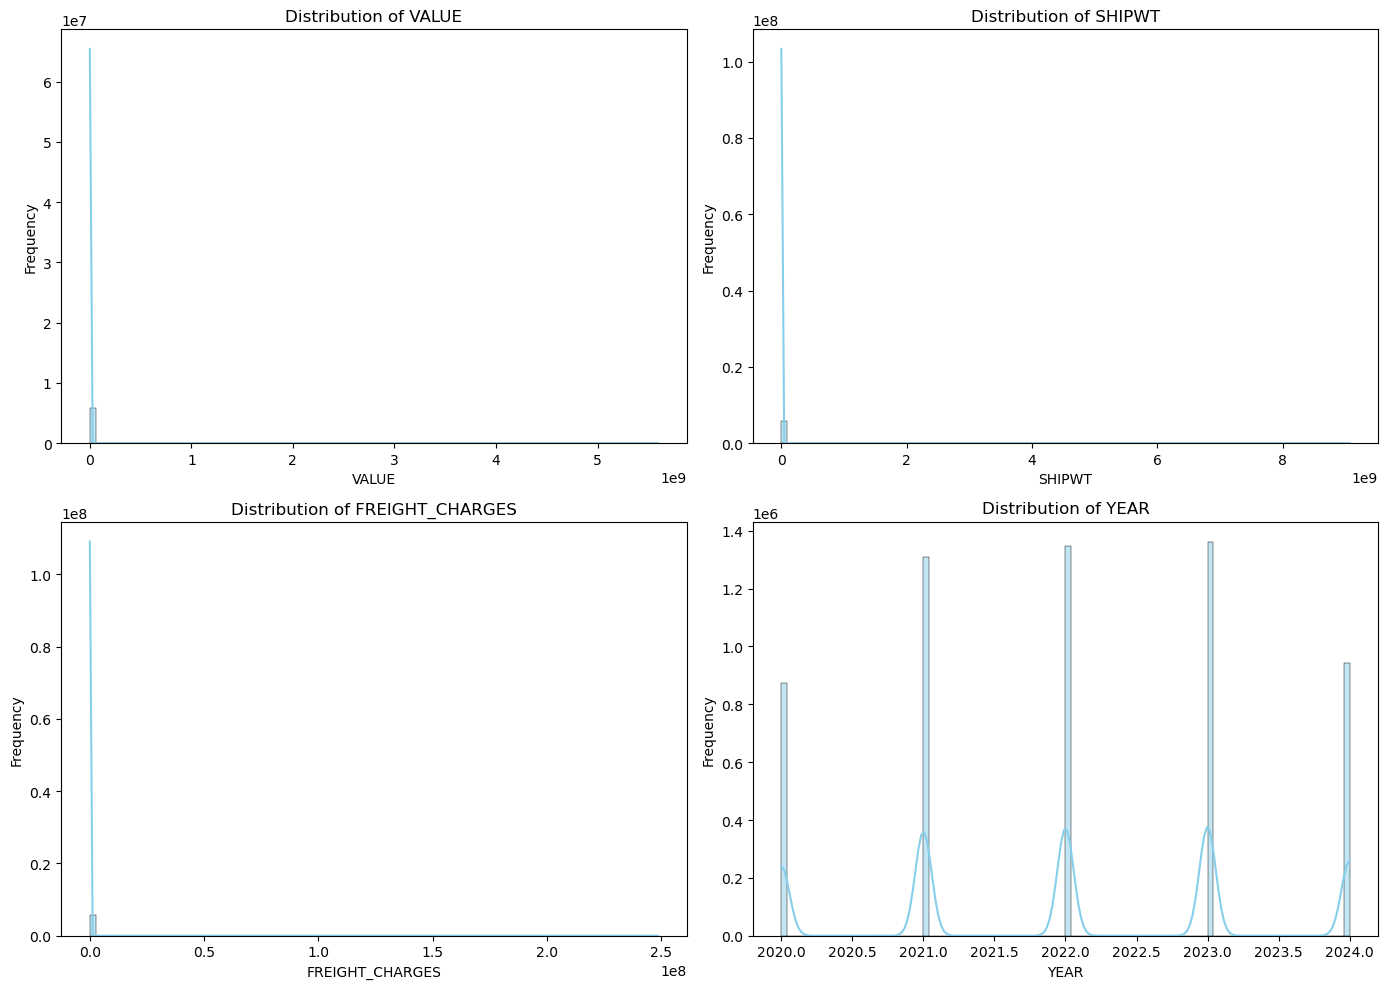

In [55]:
# Select numeric columns
numeric_cols = ['VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'YEAR']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten to iterate easily

# Plot histogram + KDE for each column
for i, col in enumerate(numeric_cols):
    sns.histplot(TFDA[col].dropna(), bins=100, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Checking for outliers**

In [62]:
# programmatic outlier detection with IQR method
for col in numeric_cols:
    Q1 = TFDA[col].quantile(0.25)
    Q3 = TFDA[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = TFDA[(TFDA[col] < lower_bound) | (TFDA[col] > upper_bound)]
    
    print(f"{col}: {len(outliers)} outliers")

VALUE: 928736 outliers
SHIPWT: 1271087 outliers
FREIGHT_CHARGES: 970418 outliers
YEAR: 0 outliers


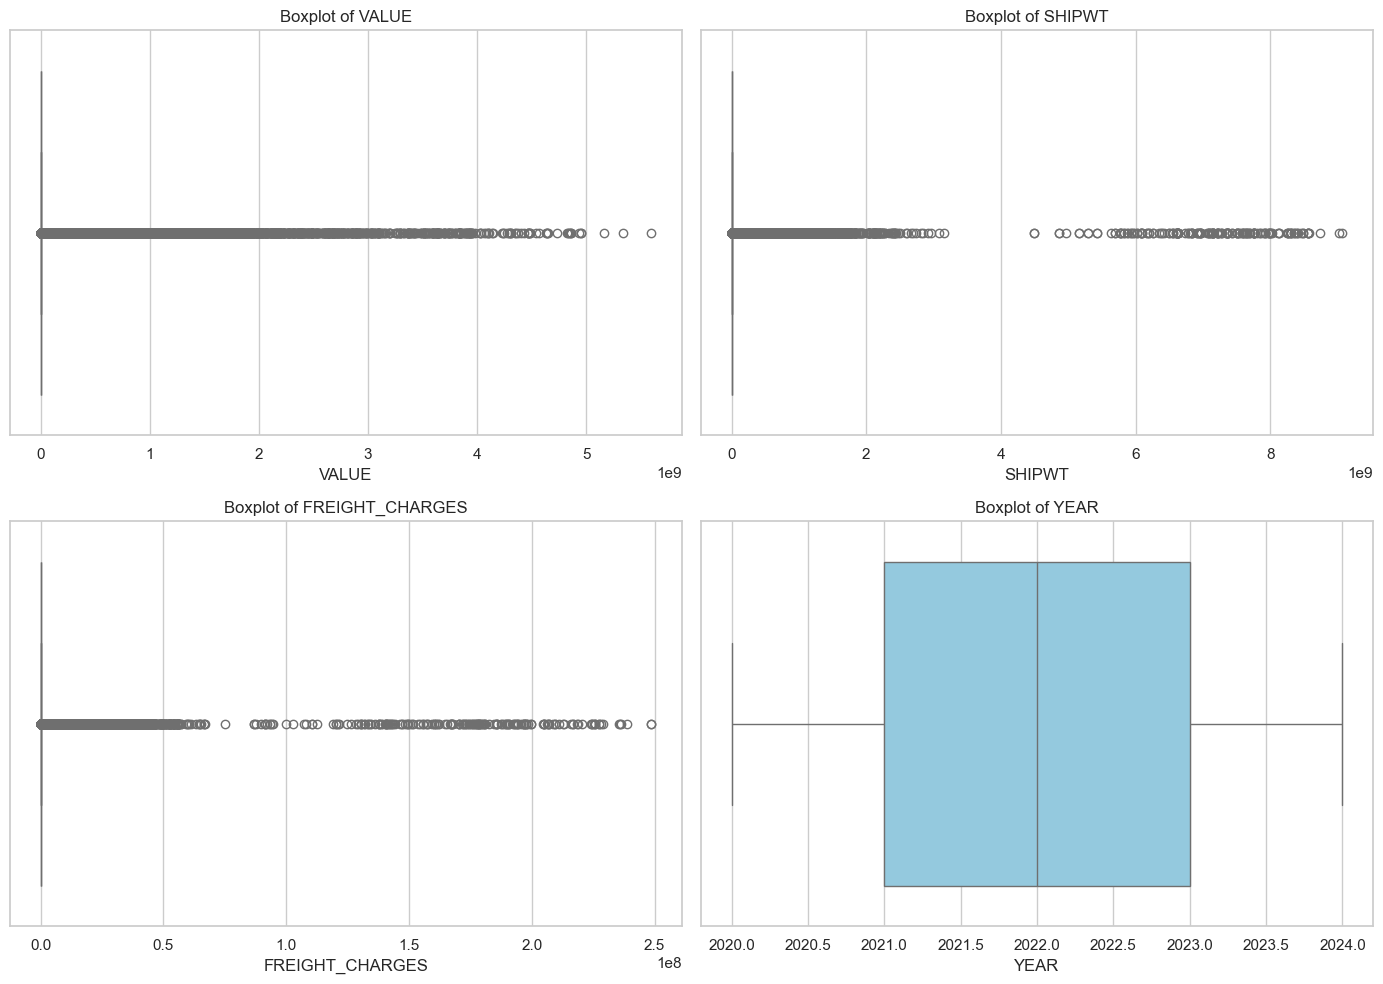

In [66]:
# Set style
sns.set(style='whitegrid')

# List of numeric columns to visualize
numeric_cols = ['VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'YEAR']

# Create subplots in a column-wise layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns
axes = axes.flatten()

# If only one column, make sure axes is iterable
if len(numeric_cols) == 1:
    axes = [axes]

# Plot boxplot for each column
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=TFDA[col], ax=ax, color='skyblue')
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


### Dealing with the outliers
1. Apply Log Transformation to reduce the skew and compress extreme values, preserving all data
2. Visualize Transformed Data

In [68]:
import numpy as np

# Apply log transformation to skewed numeric columns
TFDA['LOG_VALUE'] = np.log1p(TFDA['VALUE'])  # log1p handles 0s safely
TFDA['LOG_SHIPWT'] = np.log1p(TFDA['SHIPWT'])
TFDA['LOG_FREIGHT'] = np.log1p(TFDA['FREIGHT_CHARGES'])


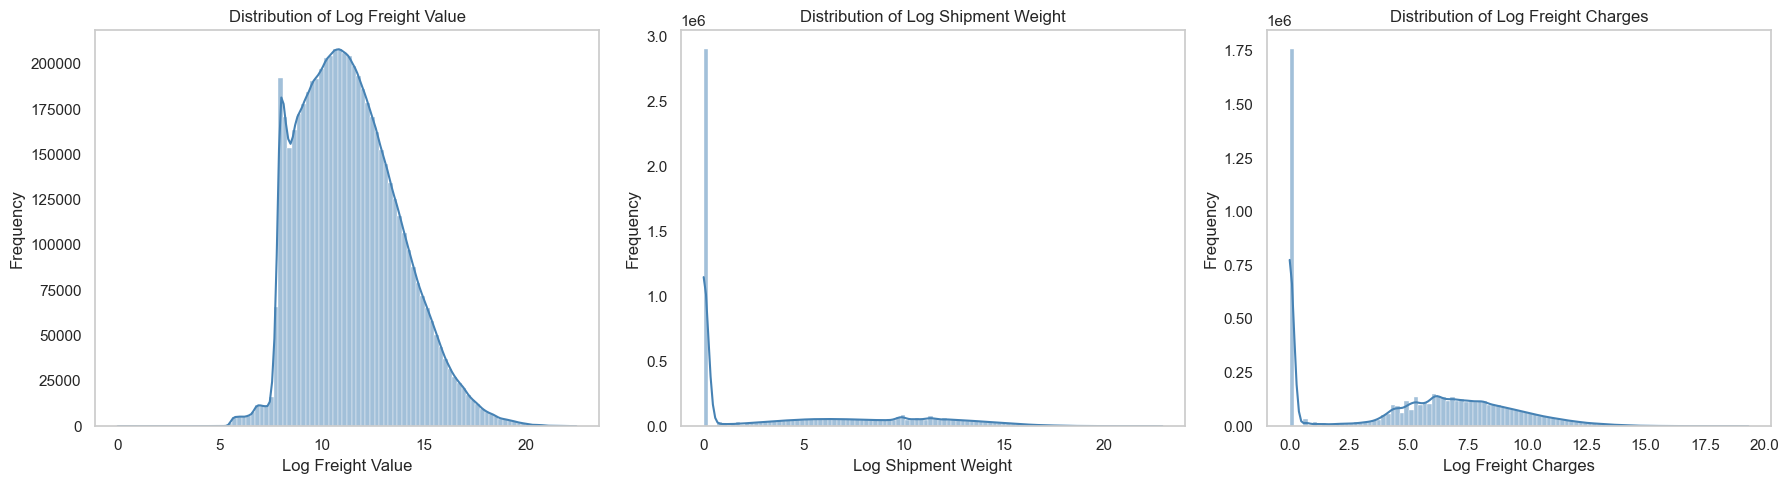

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define log columns and titles
log_cols = ['LOG_VALUE', 'LOG_SHIPWT', 'LOG_FREIGHT']
titles = ['Log Freight Value', 'Log Shipment Weight', 'Log Freight Charges']

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot each histogram without grid
for i, (col, title) in enumerate(zip(log_cols, titles)):
    sns.histplot(TFDA[col], bins=100, kde=True, color='steelblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {title}')
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(False)  # Disable grid lines

plt.tight_layout()
plt.show()


The log transformation has done a commendable job of reducing the right skewness and compressing outliers, especially in the first and third plots. It has stabilised variance and reduced influence of extreme values

### Freight Movement Patterns:
**What to analyze:**
- Volume trends by mode, region, and month
- Origin-destination flows
- Busiest trade corridors and ports

### Operational Inefficiencies:
**What to analyze:**
- Average transit time or delay per route
- Identify congestion zones
- Calculate underutilized capacity or imbalanced routes

### Environmental Impact:
**What to analyze:**
- Aggregate fuel consumption or emissions by mode
- Compare carbon footprint per ton-mile by transport type
- Visualize improvements or regressions over time

**Key Analytical Questions**

1.	Which transportation modes account for the highest freight volume and economic value across months?
2. What is the monthly distribution of freight-related carbon emissions by transportation mode?
3. Which U.S. ports or border districts (DEPE) experience the highest freight volumes and costs?
4. Is there a correlation between freight volume (SHIPWT), value (VALUE), and emissions (if available)?
5. How does the use of containerisation (CONTCODE) affect freight efficiency and charges?
6. Which commodities (COMMODITY2) and transport mode contribute most to CO2 emissions?
7. How do seasonal patterns affect freight movement efficiency and environmental outcomes?


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Checking for freight volumes over time
The chart below visualizes freight volume over for each mode of transportation. It begins by first checking for all the years in one chart and then drills down to visually track how freight volumes change over time (monthly), each in a specific year (e.g., 2020).

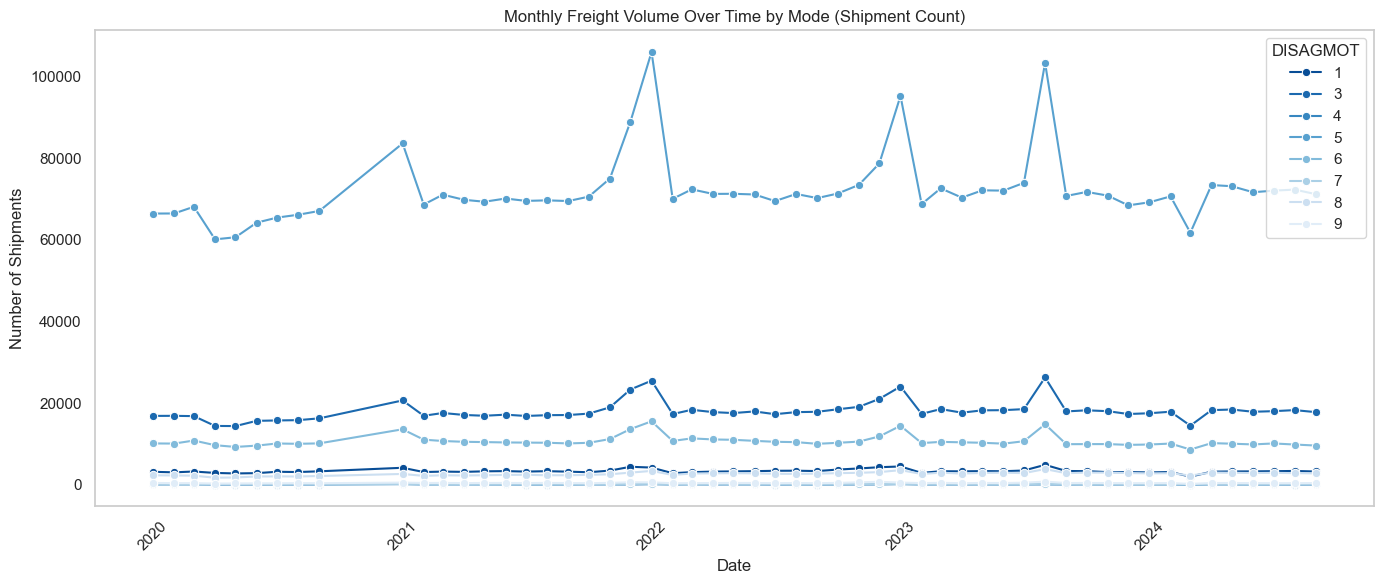

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create date column if not already created
TFDA['date'] = pd.to_datetime(TFDA[['YEAR', 'MONTH']].assign(day=1))

# Group by date and mode: count number of shipments
mode_trend_count = TFDA.groupby(['date', 'DISAGMOT']).size().reset_index(name='COUNT')

# Create blue color palette
unique_modes = sorted(mode_trend_count['DISAGMOT'].unique())
palette = sns.color_palette("Blues", n_colors=len(unique_modes))[::-1]  # darkest to lightest

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=mode_trend_count,
    x='date',
    y='COUNT',
    hue='DISAGMOT',
    marker='o',
    palette=palette
)
plt.title('Monthly Freight Volume Over Time by Mode (Shipment Count)')
plt.ylabel('Number of Shipments')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

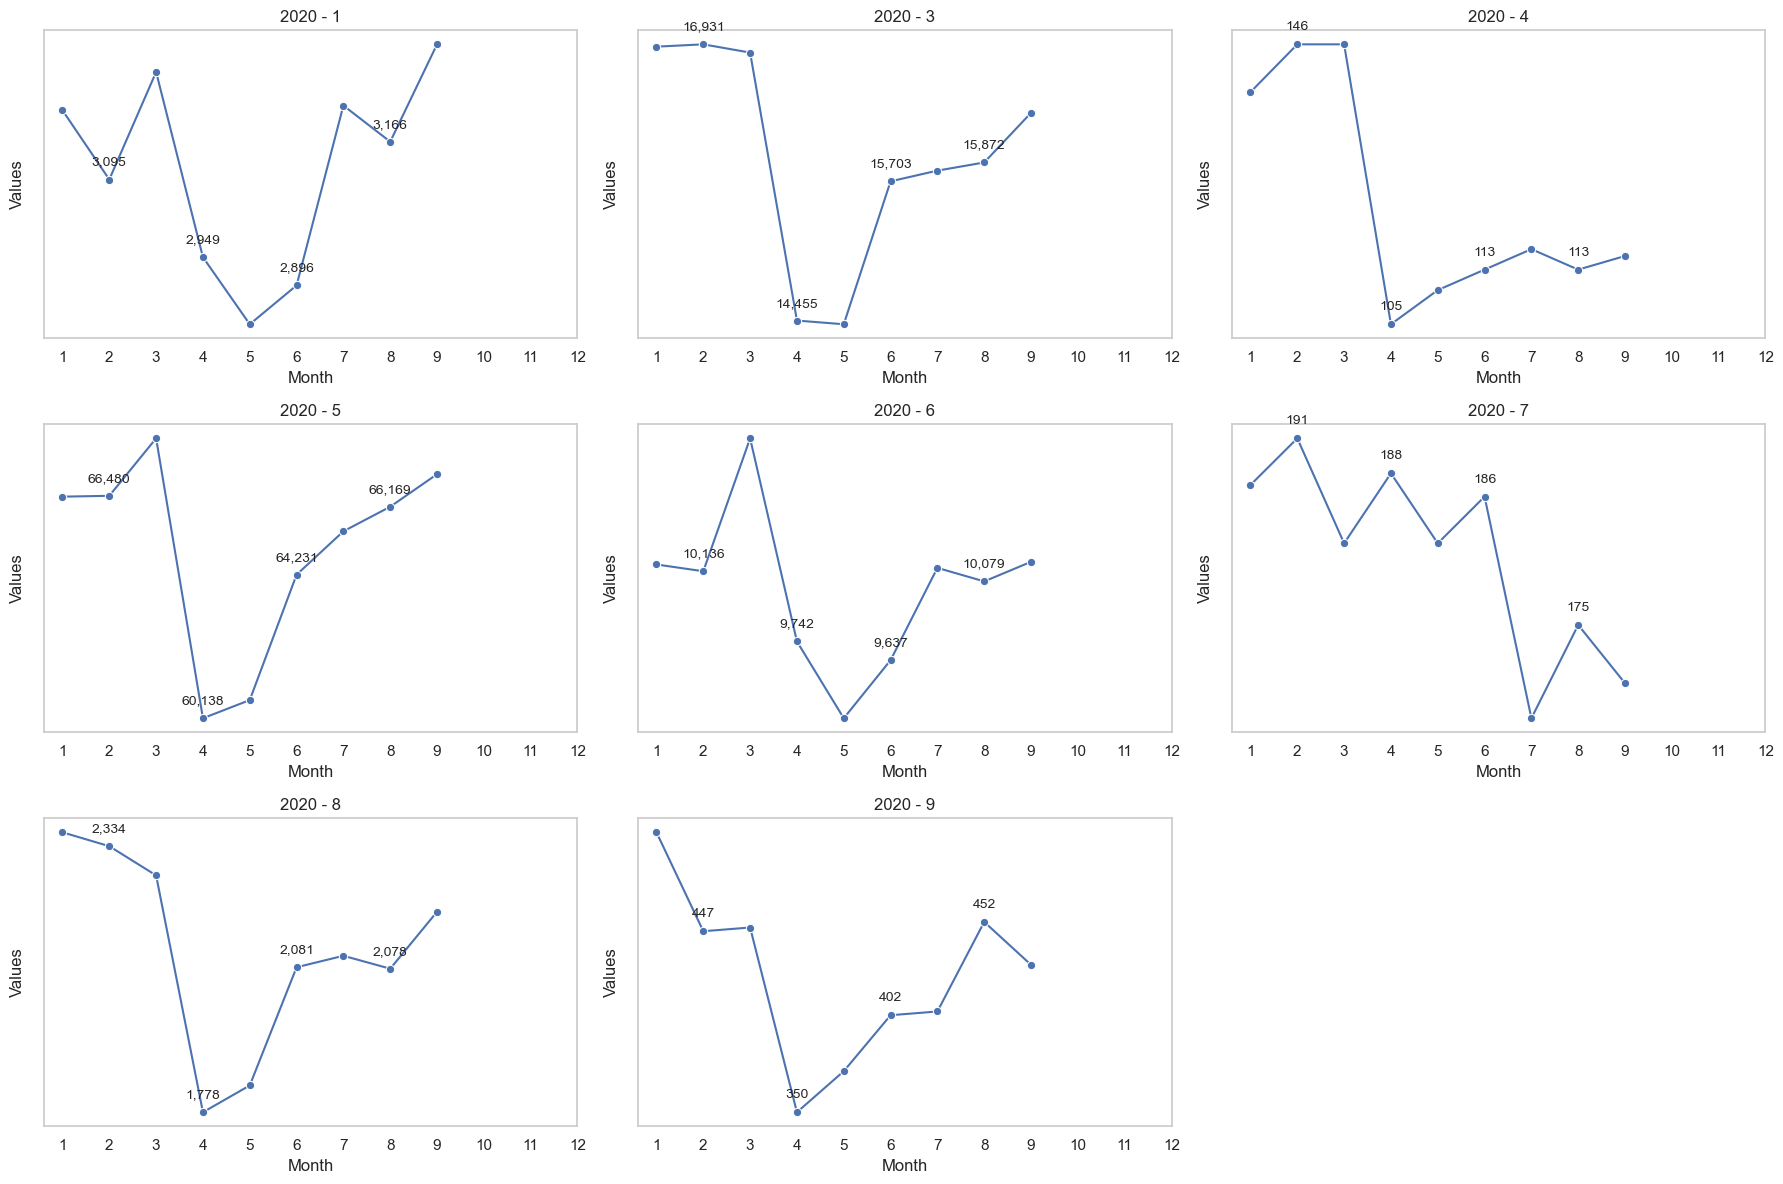

In [93]:
# Count number of shipments per month, mode, and year
monthly_mode_count = TFDA.groupby(['YEAR', 'DISAGMOT', 'MONTH']).size().reset_index(name='COUNT')

# Filter for year 2020
subset_2020 = monthly_mode_count[monthly_mode_count['YEAR'] == 2020]

# Get unique modes
modes = sorted(subset_2020['DISAGMOT'].unique())

# Set chart layout: 2 charts per row
charts_per_row = 3
total_charts = len(modes)
rows = -(-total_charts // charts_per_row)  # Ceiling division

fig, axes = plt.subplots(rows, charts_per_row, figsize=(charts_per_row * 6, rows * 4), sharey=False)
axes = axes.flatten()

# Target months for data labels
label_months = [2, 4, 6, 8, 10, 12]

# Plot for each mode
for i, mode in enumerate(modes):
    ax = axes[i]
    mode_data = subset_2020[subset_2020['DISAGMOT'] == mode]
    
    sns.lineplot(data=mode_data, x='MONTH', y='COUNT', marker='o', ax=ax)
    
    ax.set_title(f'2020 - {mode}', fontsize=12)
    ax.set_xlabel('Month')
    ax.set_ylabel('Values')
    ax.set_yticklabels([])  # Remove numeric values from y-axis
    ax.set_xticks(range(1, 13))
    ax.grid(False)  # Disable grid lines

    # Add labels only for selected months
    for _, row in mode_data.iterrows():
        if row['MONTH'] in label_months:
            ax.annotate(f'{int(row["COUNT"]):,}', xy=(row['MONTH'], row['COUNT']),
                        textcoords='offset points', xytext=(0, 10),
                        ha='center', fontsize=10)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


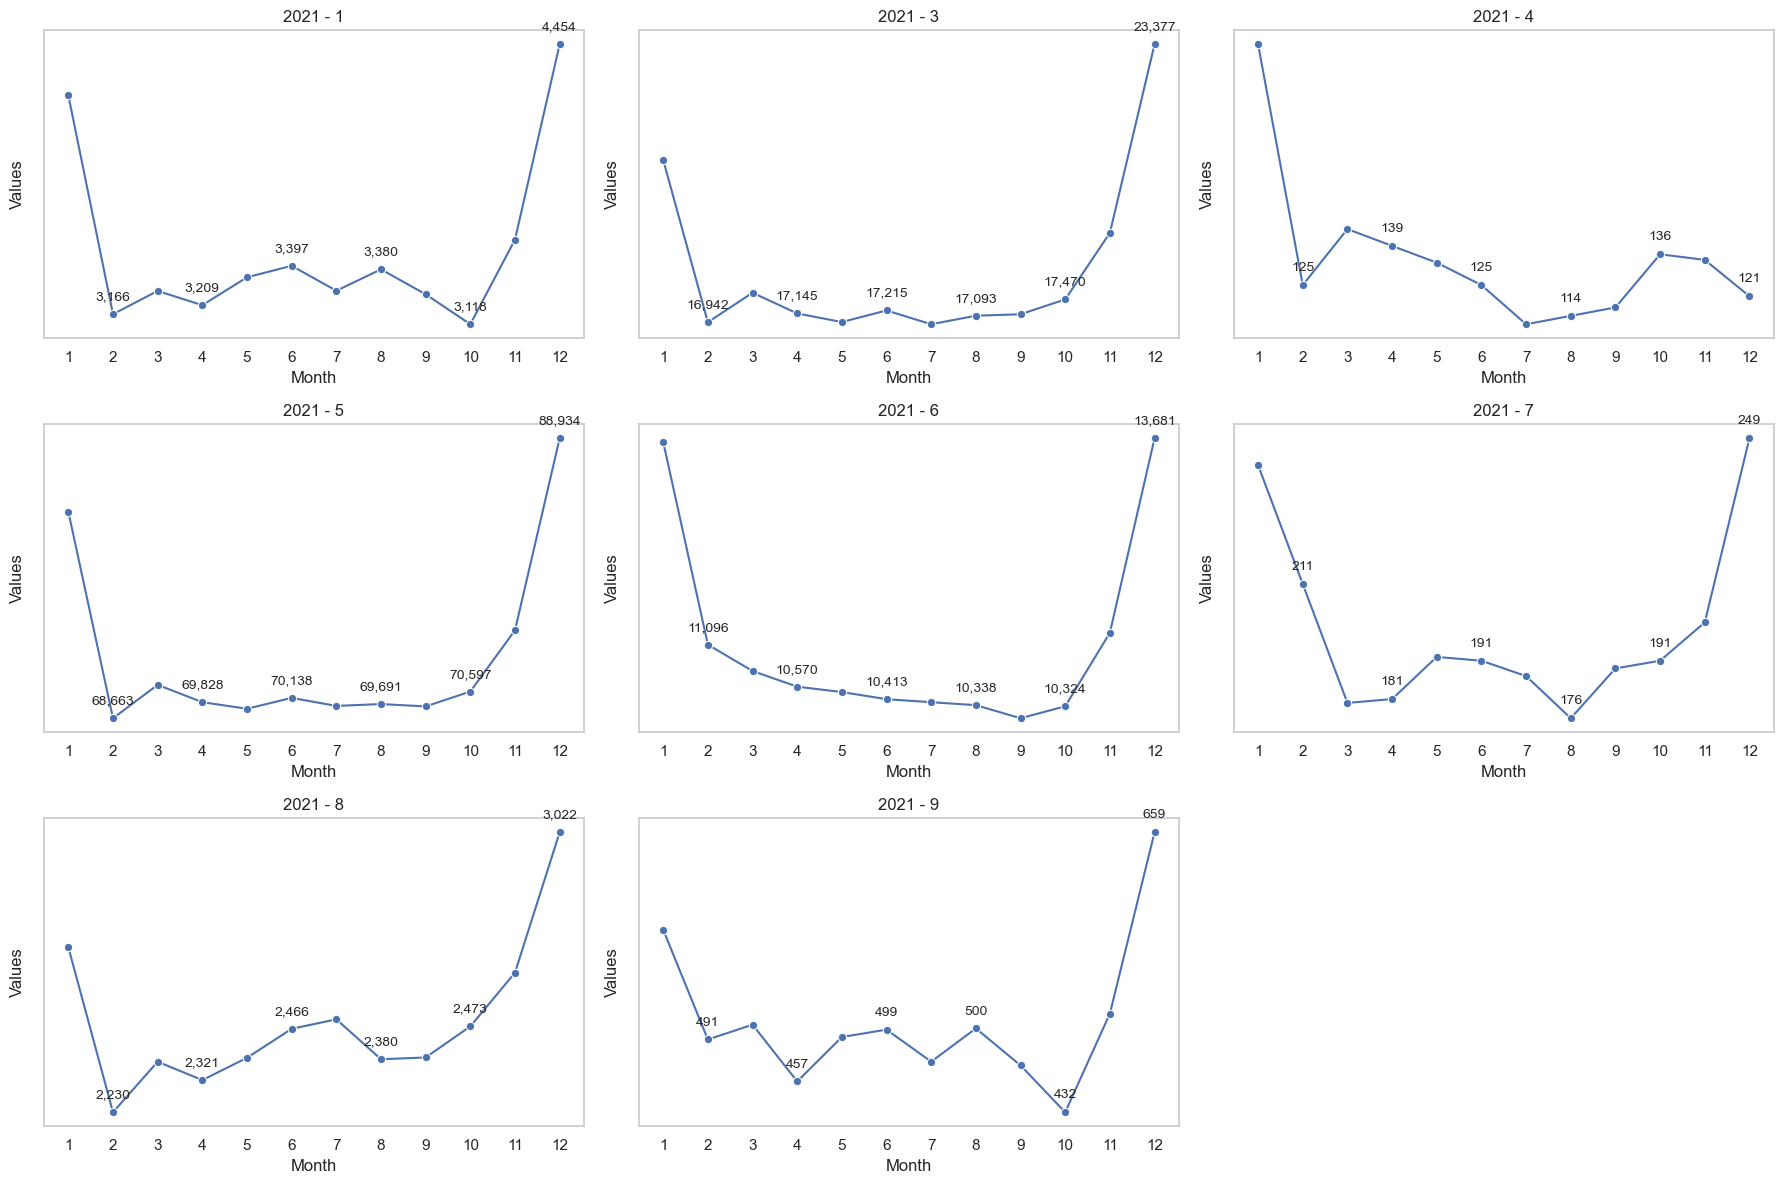

In [95]:
# Count number of shipments per month, mode, and year
monthly_mode_count = TFDA.groupby(['YEAR', 'DISAGMOT', 'MONTH']).size().reset_index(name='COUNT')

# Filter for year 2021
subset_2021 = monthly_mode_count[monthly_mode_count['YEAR'] == 2021]

# Get unique modes
modes = sorted(subset_2021['DISAGMOT'].unique())

# Set chart layout: 2 charts per row
charts_per_row = 3
total_charts = len(modes)
rows = -(-total_charts // charts_per_row)  # Ceiling division

fig, axes = plt.subplots(rows, charts_per_row, figsize=(charts_per_row * 6, rows * 4), sharey=False)
axes = axes.flatten()

# Target months for data labels
label_months = [2, 4, 6, 8, 10, 12]

# Plot for each mode
for i, mode in enumerate(modes):
    ax = axes[i]
    mode_data = subset_2021[subset_2021['DISAGMOT'] == mode]
    
    sns.lineplot(data=mode_data, x='MONTH', y='COUNT', marker='o', ax=ax)
    
    ax.set_title(f'2021 - {mode}', fontsize=12)
    ax.set_xlabel('Month')
    ax.set_ylabel('Values')
    ax.set_yticklabels([])  # Remove numeric values from y-axis
    ax.set_xticks(range(1, 13))
    ax.grid(False)  # Disable grid lines

    # Add labels only for selected months
    for _, row in mode_data.iterrows():
        if row['MONTH'] in label_months:
            ax.annotate(f'{int(row["COUNT"]):,}', xy=(row['MONTH'], row['COUNT']),
                        textcoords='offset points', xytext=(0, 10),
                        ha='center', fontsize=10)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


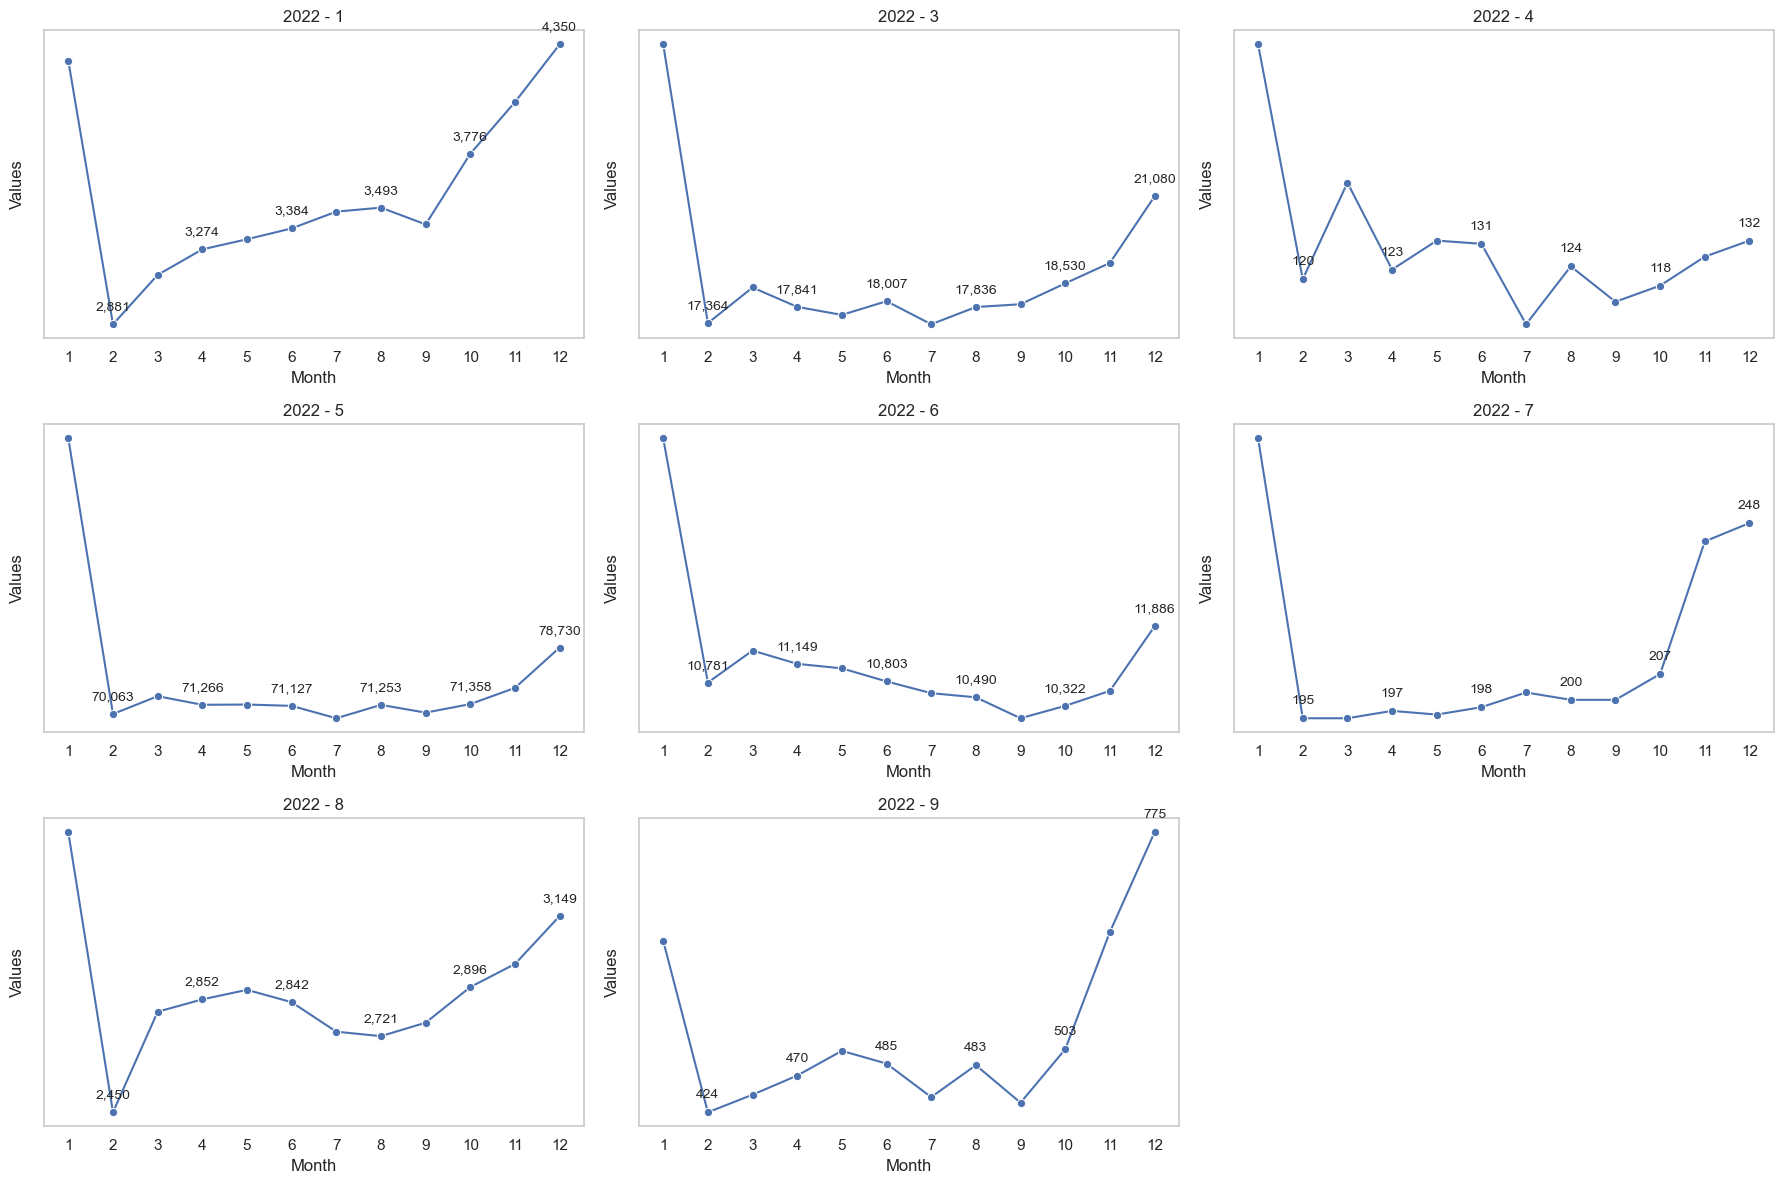

In [101]:
# Count number of shipments per month, mode, and year
monthly_mode_count = TFDA.groupby(['YEAR', 'DISAGMOT', 'MONTH']).size().reset_index(name='COUNT')

# Filter for year 2020
subset_2022 = monthly_mode_count[monthly_mode_count['YEAR'] == 2022]

# Get unique modes
modes = sorted(subset_2022['DISAGMOT'].unique())

# Set chart layout: 2 charts per row
charts_per_row = 3
total_charts = len(modes)
rows = -(-total_charts // charts_per_row)  # Ceiling division

fig, axes = plt.subplots(rows, charts_per_row, figsize=(charts_per_row * 6, rows * 4), sharey=False)
axes = axes.flatten()

# Target months for data labels
label_months = [2, 4, 6, 8, 10, 12]

# Plot for each mode
for i, mode in enumerate(modes):
    ax = axes[i]
    mode_data = subset_2022[subset_2022['DISAGMOT'] == mode]
    
    sns.lineplot(data=mode_data, x='MONTH', y='COUNT', marker='o', ax=ax)
    
    ax.set_title(f'2022 - {mode}', fontsize=12)
    ax.set_xlabel('Month')
    ax.set_ylabel('Values')
    ax.set_yticklabels([])  # Remove numeric values from y-axis
    ax.set_xticks(range(1, 13))
    ax.grid(False)  # Disable grid lines

    # Add labels only for selected months
    for _, row in mode_data.iterrows():
        if row['MONTH'] in label_months:
            ax.annotate(f'{int(row["COUNT"]):,}', xy=(row['MONTH'], row['COUNT']),
                        textcoords='offset points', xytext=(0, 10),
                        ha='center', fontsize=10)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


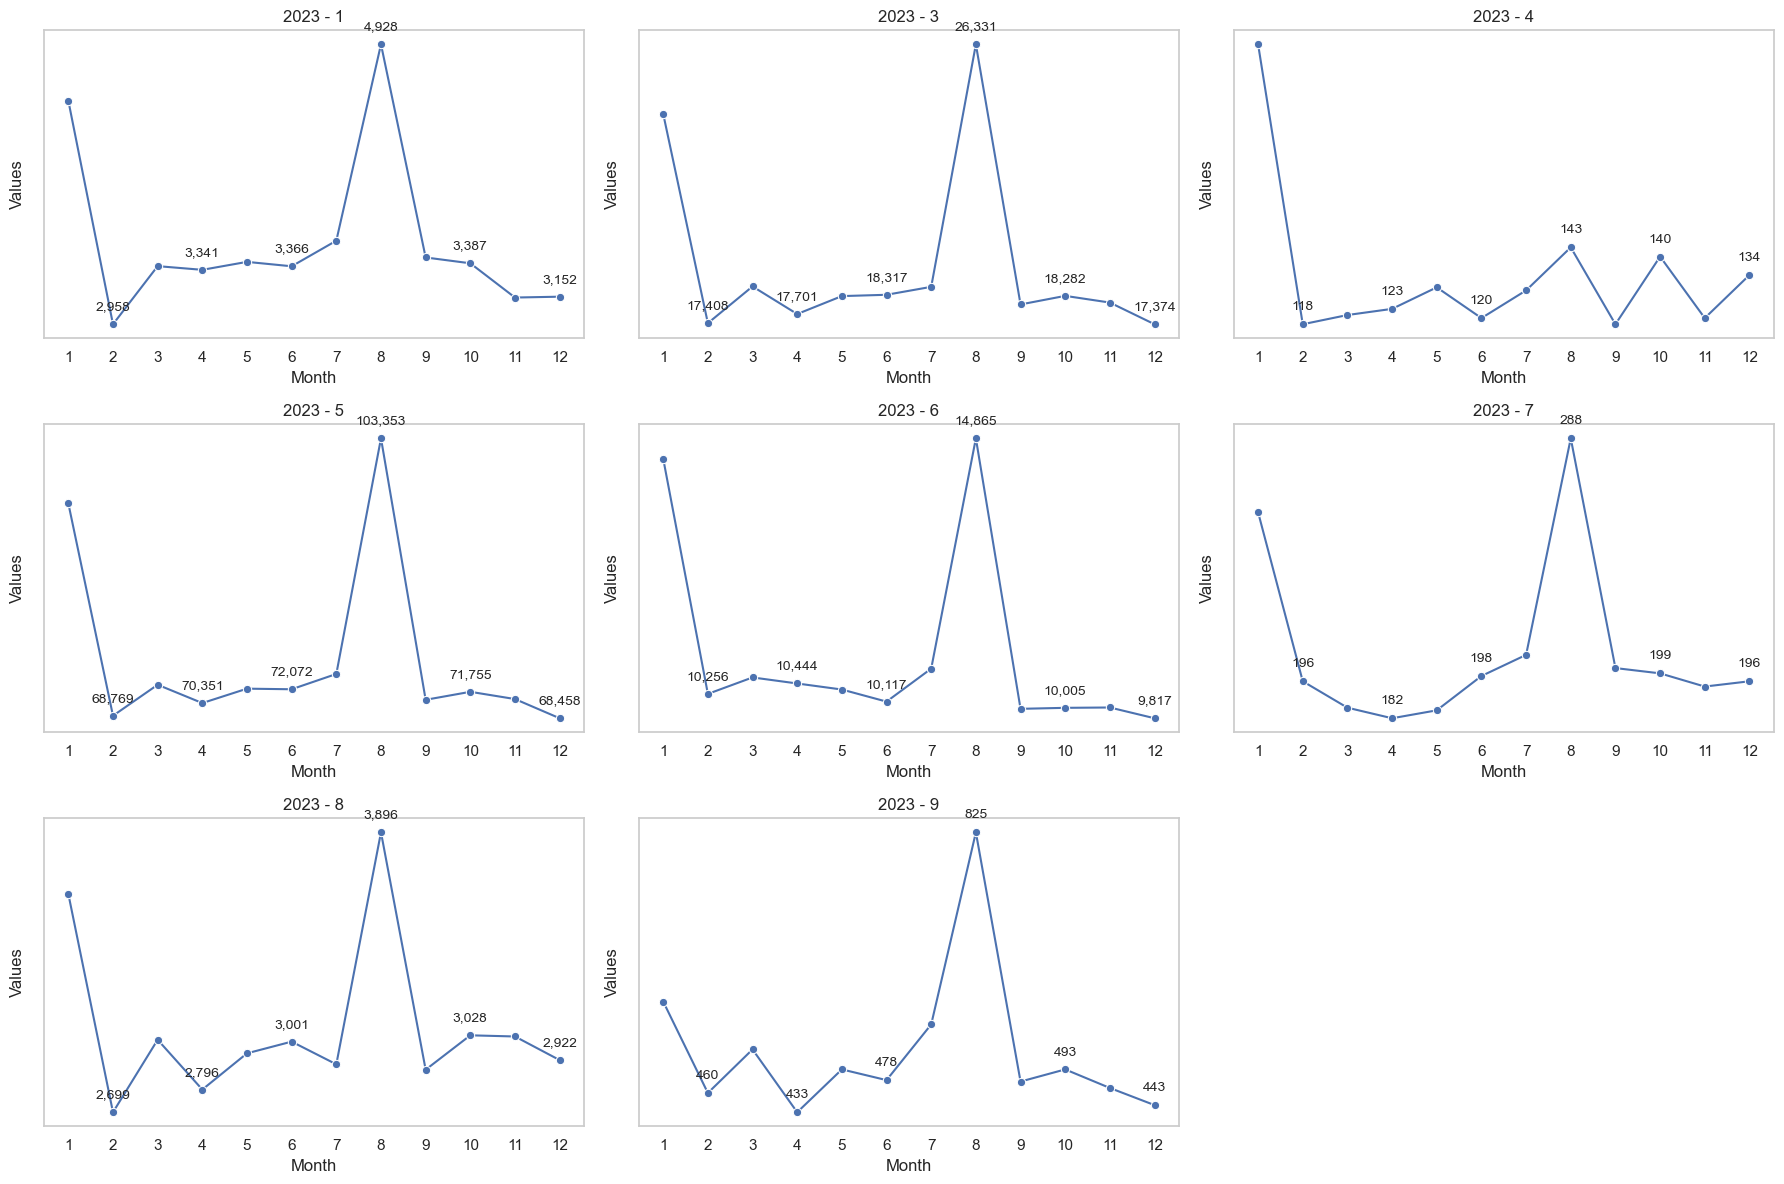

In [102]:
# Count number of shipments per month, mode, and year
monthly_mode_count = TFDA.groupby(['YEAR', 'DISAGMOT', 'MONTH']).size().reset_index(name='COUNT')

# Filter for year 2023
subset_2023 = monthly_mode_count[monthly_mode_count['YEAR'] == 2023]

# Get unique modes
modes = sorted(subset_2020['DISAGMOT'].unique())

# Set chart layout: 2 charts per row
charts_per_row = 3
total_charts = len(modes)
rows = -(-total_charts // charts_per_row)  # Ceiling division

fig, axes = plt.subplots(rows, charts_per_row, figsize=(charts_per_row * 6, rows * 4), sharey=False)
axes = axes.flatten()

# Target months for data labels
label_months = [2, 4, 6, 8, 10, 12]

# Plot for each mode
for i, mode in enumerate(modes):
    ax = axes[i]
    mode_data = subset_2023[subset_2023['DISAGMOT'] == mode]
    
    sns.lineplot(data=mode_data, x='MONTH', y='COUNT', marker='o', ax=ax)
    
    ax.set_title(f'2023 - {mode}', fontsize=12)
    ax.set_xlabel('Month')
    ax.set_ylabel('Values')
    ax.set_yticklabels([])  # Remove numeric values from y-axis
    ax.set_xticks(range(1, 13))
    ax.grid(False)  # Disable grid lines

    # Add labels only for selected months
    for _, row in mode_data.iterrows():
        if row['MONTH'] in label_months:
            ax.annotate(f'{int(row["COUNT"]):,}', xy=(row['MONTH'], row['COUNT']),
                        textcoords='offset points', xytext=(0, 10),
                        ha='center', fontsize=10)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


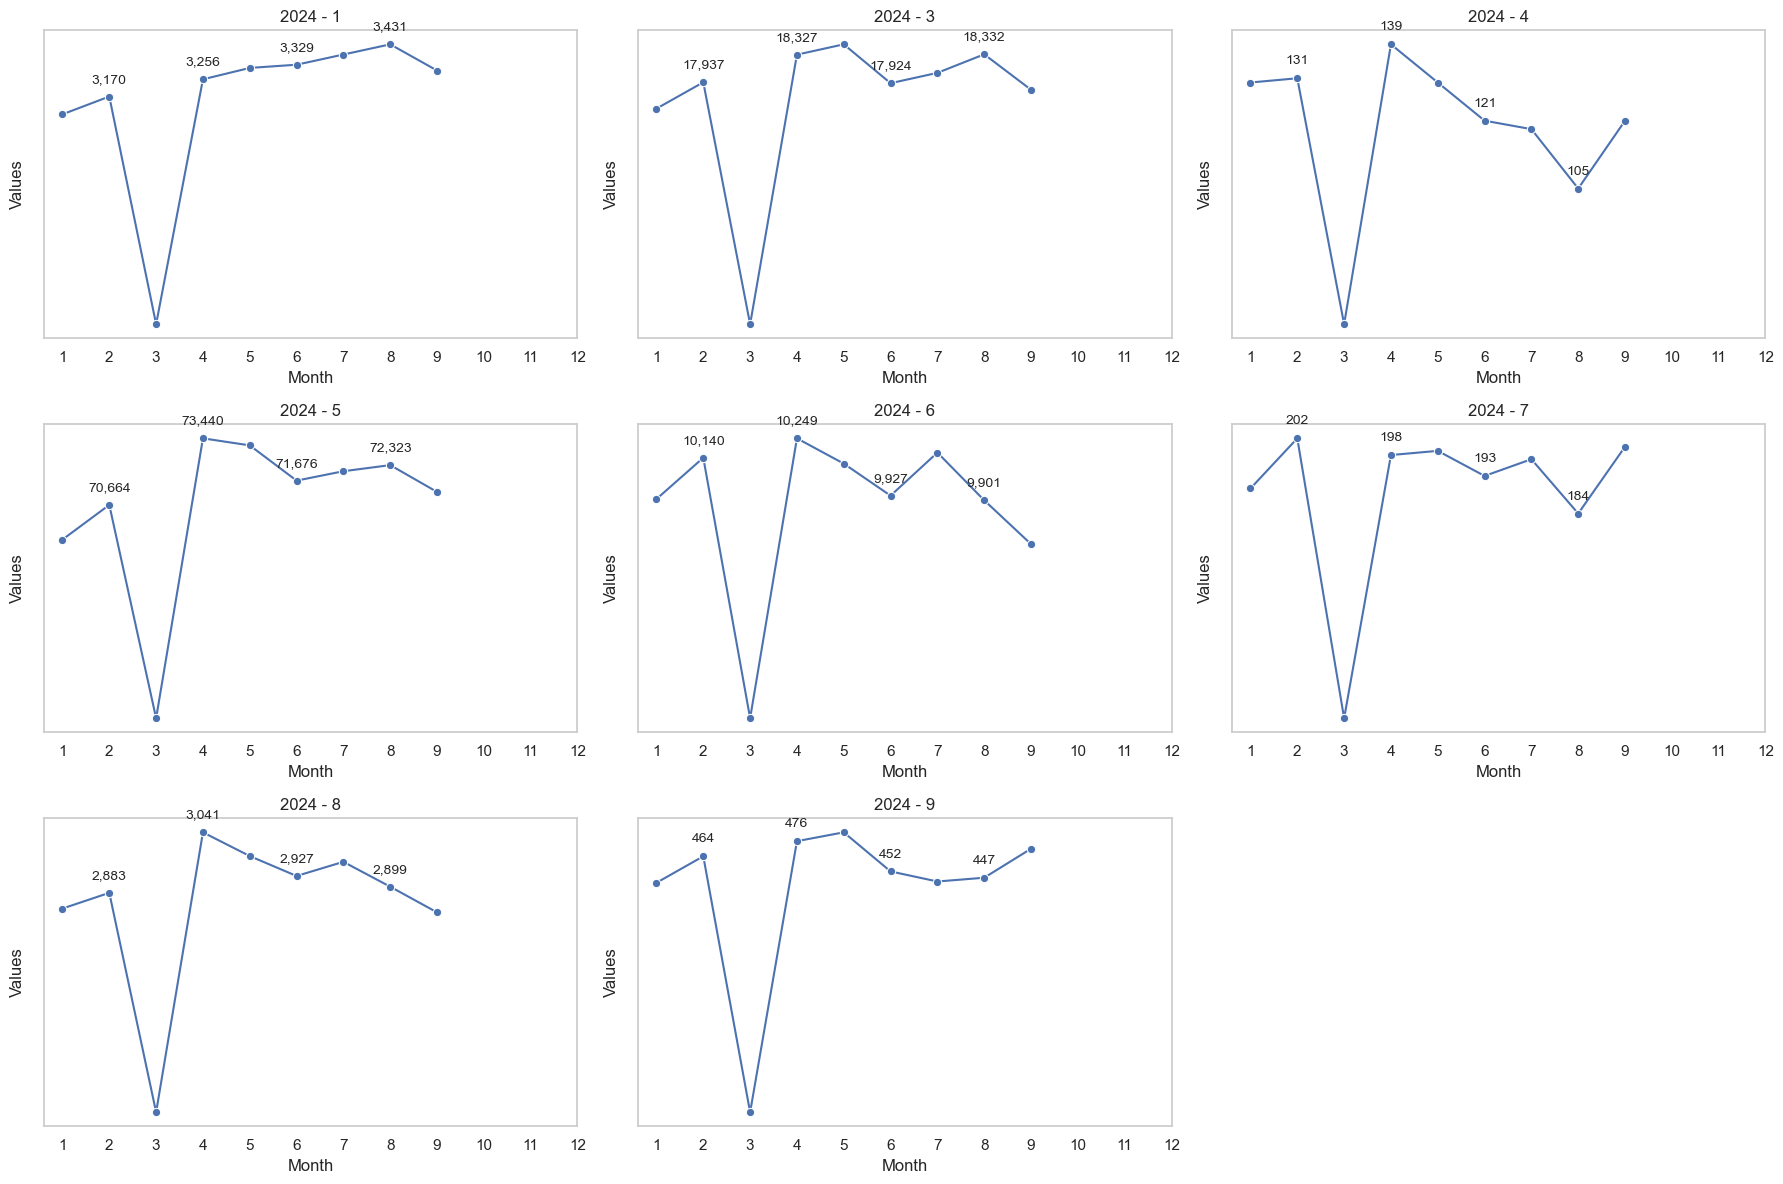

In [105]:
# Count number of shipments per month, mode, and year
monthly_mode_count = TFDA.groupby(['YEAR', 'DISAGMOT', 'MONTH']).size().reset_index(name='COUNT')

# Filter for year 2024
subset_2024 = monthly_mode_count[monthly_mode_count['YEAR'] == 2024]

# Get unique modes
modes = sorted(subset_2024['DISAGMOT'].unique())

# Set chart layout: 2 charts per row
charts_per_row = 3
total_charts = len(modes)
rows = -(-total_charts // charts_per_row)  # Ceiling division

fig, axes = plt.subplots(rows, charts_per_row, figsize=(charts_per_row * 6, rows * 4), sharey=False)
axes = axes.flatten()

# Target months for data labels
label_months = [2, 4, 6, 8, 10, 12]

# Plot for each mode
for i, mode in enumerate(modes):
    ax = axes[i]
    mode_data = subset_2024[subset_2024['DISAGMOT'] == mode]
    
    sns.lineplot(data=mode_data, x='MONTH', y='COUNT', marker='o', ax=ax)
    
    ax.set_title(f'2024 - {mode}', fontsize=12)
    ax.set_xlabel('Month')
    ax.set_ylabel('Values')
    ax.set_yticklabels([])  # Remove numeric values from y-axis
    ax.set_xticks(range(1, 13))
    ax.grid(False)  # Disable grid lines

    # Add labels only for selected months
    for _, row in mode_data.iterrows():
        if row['MONTH'] in label_months:
            ax.annotate(f'{int(row["COUNT"]):,}', xy=(row['MONTH'], row['COUNT']),
                        textcoords='offset points', xytext=(0, 10),
                        ha='center', fontsize=10)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


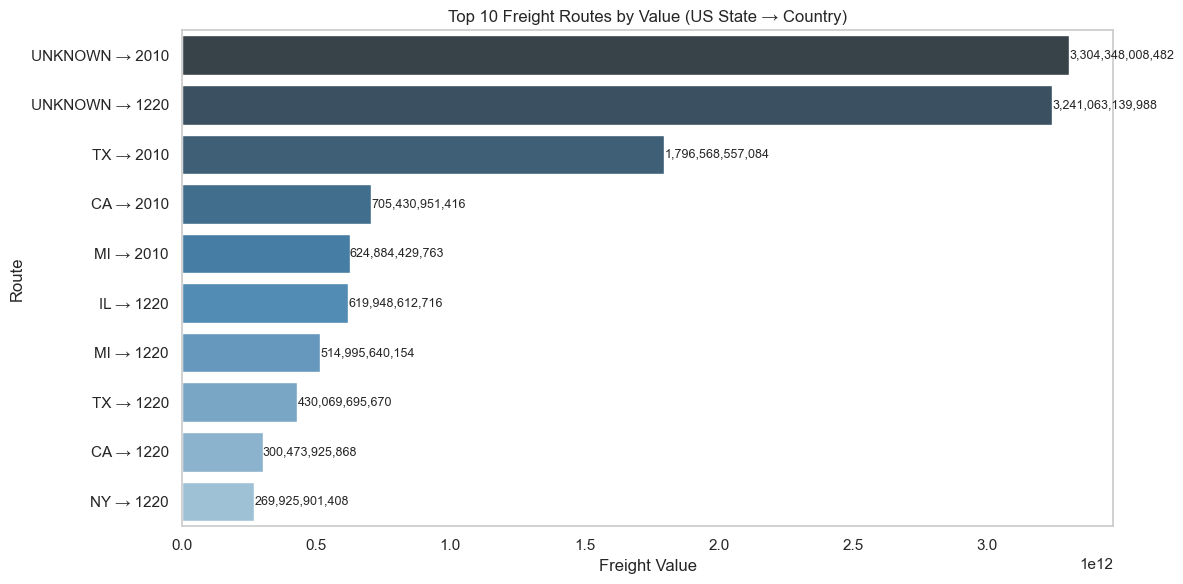

In [109]:
# Compute top 10 freight routes (state → country)
top_routes = (
    TFDA.groupby(['USASTATE', 'COUNTRY'])['VALUE']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Create route label
top_routes['Route'] = top_routes['USASTATE'].astype(str) + ' → ' + top_routes['COUNTRY'].astype(str)

# Sort again to maintain bar order for color mapping
top_routes = top_routes.sort_values('VALUE', ascending=False)

# Reverse the palette for light to dark
palette = sns.color_palette("Blues_d", n_colors=10)[::-1]

# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=top_routes, y='Route', x='VALUE', palette=palette)

# Add data labels
for i, value in enumerate(top_routes['VALUE']):
    barplot.text(value + 1e6, i, f'{int(value):,}', va='center', fontsize=9)

# Formatting
plt.title('Top 10 Freight Routes by Value (US State → Country)')
plt.xlabel('Freight Value')
plt.ylabel('Route')
plt.tight_layout()
plt.grid(False)
plt.show()


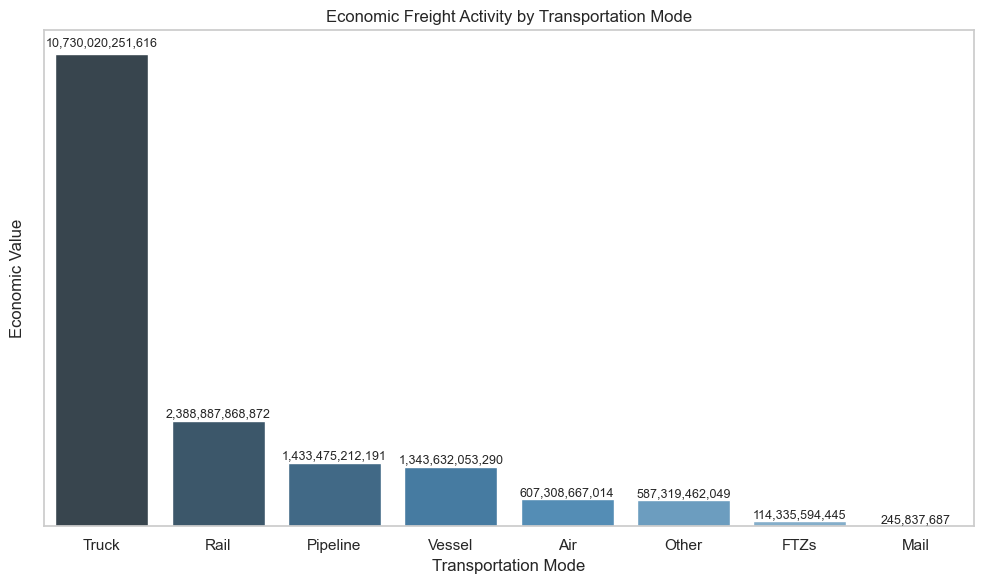

In [111]:
# Define mapping from DISAGMOT codes to mode names
mode_mapping = {
    1: 'Vessel',
    3: 'Air',
    4: 'Mail',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'FTZs'
}

# Map codes to names
TFDA['MODE_NAME'] = TFDA['DISAGMOT'].map(mode_mapping)

# Group total value by mode name, sort descending
volume_by_mode = TFDA.groupby('MODE_NAME')['VALUE'].sum().sort_values(ascending=False).reset_index()

# Reversed color palette (darkest to lightest)
colors = sns.color_palette('Blues_d', n_colors=len(volume_by_mode))[::-1]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=volume_by_mode, x='MODE_NAME', y='VALUE', palette=colors, order=volume_by_mode['MODE_NAME'])

# Add data labels on top of each bar
for i, row in volume_by_mode.iterrows():
    plt.text(i, row['VALUE'] + row['VALUE'] * 0.01, f'{int(row["VALUE"]):,}', 
             ha='center', va='bottom', fontsize=9)

# Customize axes and title
plt.title('Economic Freight Activity by Transportation Mode')
plt.xlabel('Transportation Mode')
plt.ylabel('Economic Value')
plt.gca().set_yticklabels([])  # Remove y-axis tick labels

plt.tight_layout()
plt.grid(False)
plt.show()


**1. Which transportation modes account for the highest freight volume and economic value across months?**

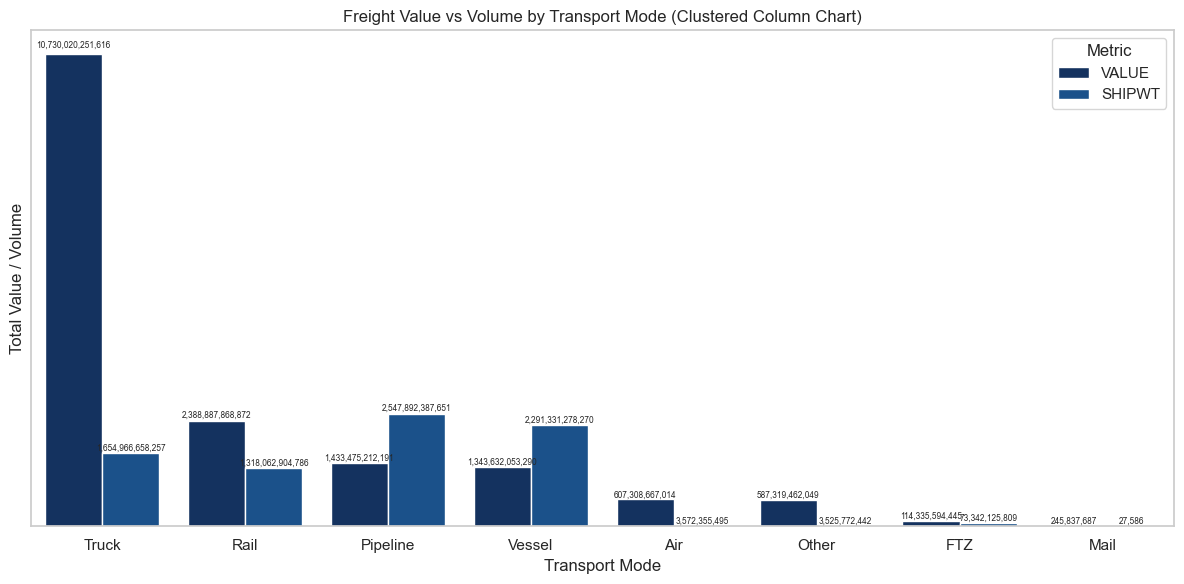

In [303]:
# Map DISAGMOT codes to transport mode names
mode_mapping = {
    1: 'Vessel',
    3: 'Air',
    4: 'Mail',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'FTZ'
}

# Group data
mode_summary = TFDA.groupby('DISAGMOT')[['VALUE', 'SHIPWT']].sum().reset_index()

# Map codes to mode names
mode_summary['Mode'] = mode_summary['DISAGMOT'].map(mode_mapping)

# Melt for clustered bar chart
melted = pd.melt(
    mode_summary,
    id_vars='Mode',
    value_vars=['VALUE', 'SHIPWT'],
    var_name='Metric',
    value_name='Total'
)

# Sort modes by VALUE
order = mode_summary.sort_values('VALUE', ascending=False)['Mode'].tolist()

# Dark-to-light palette
palette = ['#08306b', '#08519c']

# Plot clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted,
    x='Mode',
    y='Total',
    hue='Metric',
    order=order,
    palette=palette
)

# Add data labels
for bar_group in plt.gca().containers:
    for rect in bar_group:
        height = rect.get_height()
        if height > 0:
            plt.text(
                rect.get_x() + rect.get_width() / 2,
                height + height * 0.01,
                f'{int(height):,}',
                ha='center',
                va='bottom',
                fontsize=6
            )

# Customize
plt.title('Freight Value vs Volume by Transport Mode (Clustered Column Chart)')
plt.xlabel('Transport Mode')
plt.ylabel('Total Value / Volume')  # Remove label
plt.yticks([])  # Remove y-axis tick values
plt.legend(title='Metric')
plt.grid(False)
plt.tight_layout()
plt.show()


**2. What is the monthly distribution of freight-related carbon emissions by transportation mode?**

Since the dataset has no columns for emissions, we'll simulate emissions using approximate CO₂ emission factors per kg of freight depending on transport mode.

In [135]:
# Define emission factors (kg CO2 per kg of freight)
emission_factors = {
    1: 0.015,  # Vessel
    3: 0.50,   # Air
    4: 0.30,   # Mail
    5: 0.12,   # Truck
    6: 0.04,   # Rail
    7: 0.03,   # Pipeline
    8: 0.10,   # Other
    9: 0.05    # Foreign Trade Zones
}

# Map emission factors to the dataset
TFDA['EMISSION_FACTOR'] = TFDA['DISAGMOT'].map(emission_factors)

# Estimate emissions in kilograms
TFDA['EMISSIONS_KG'] = TFDA['SHIPWT'] * TFDA['EMISSION_FACTOR']

# Convert emissions to tons for better readability
TFDA['EMISSIONS_TON'] = TFDA['EMISSIONS_KG'] / 1000


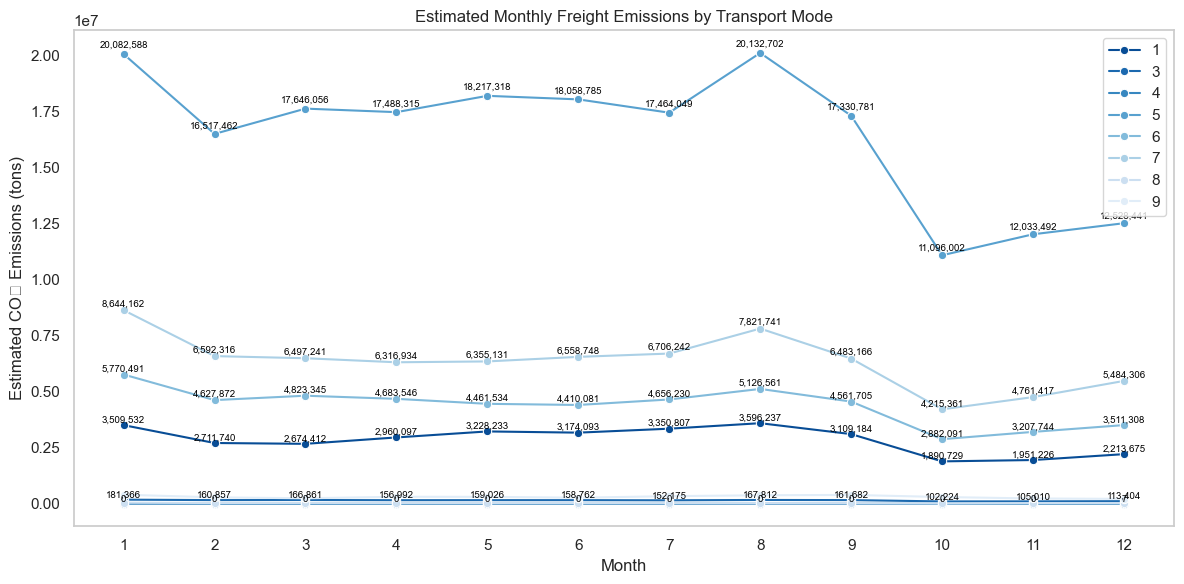

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group monthly emissions by mode
monthly_emissions = TFDA.groupby(['MONTH', 'DISAGMOT'])['EMISSIONS_TON'].sum().reset_index()

# Set up plot
plt.figure(figsize=(12, 6))

# Create a sorted list of modes and reversed blue color palette (darkest to lightest)
all_modes = sorted(monthly_emissions['DISAGMOT'].unique())
colors = sns.color_palette("Blues", n_colors=len(all_modes))[::-1]  # reversed

# Plot each mode separately
for i, mode in enumerate(all_modes):
    mode_data = monthly_emissions[monthly_emissions['DISAGMOT'] == mode]
    
    # Plot line with marker
    sns.lineplot(
        data=mode_data,
        x='MONTH',
        y='EMISSIONS_TON',
        label=mode,
        marker='o',
        color=colors[i]
    )

    # Add data labels only for modes not in [9, 8]
    if mode not in [9, 8]:
        for _, row in mode_data.iterrows():
            plt.text(
                row['MONTH'],
                row['EMISSIONS_TON'] + row['EMISSIONS_TON'] * 0.01,
                f"{int(row['EMISSIONS_TON']):,}",
                ha='center',
                va='bottom',
                fontsize=7,
                color='Black'
            )

# Customize plot
plt.title('Estimated Monthly Freight Emissions by Transport Mode')
plt.xlabel('Month')
plt.ylabel('Estimated CO₂ Emissions (tons)')
plt.xticks(range(1, 13))
plt.grid(False)
plt.tight_layout()
plt.show()


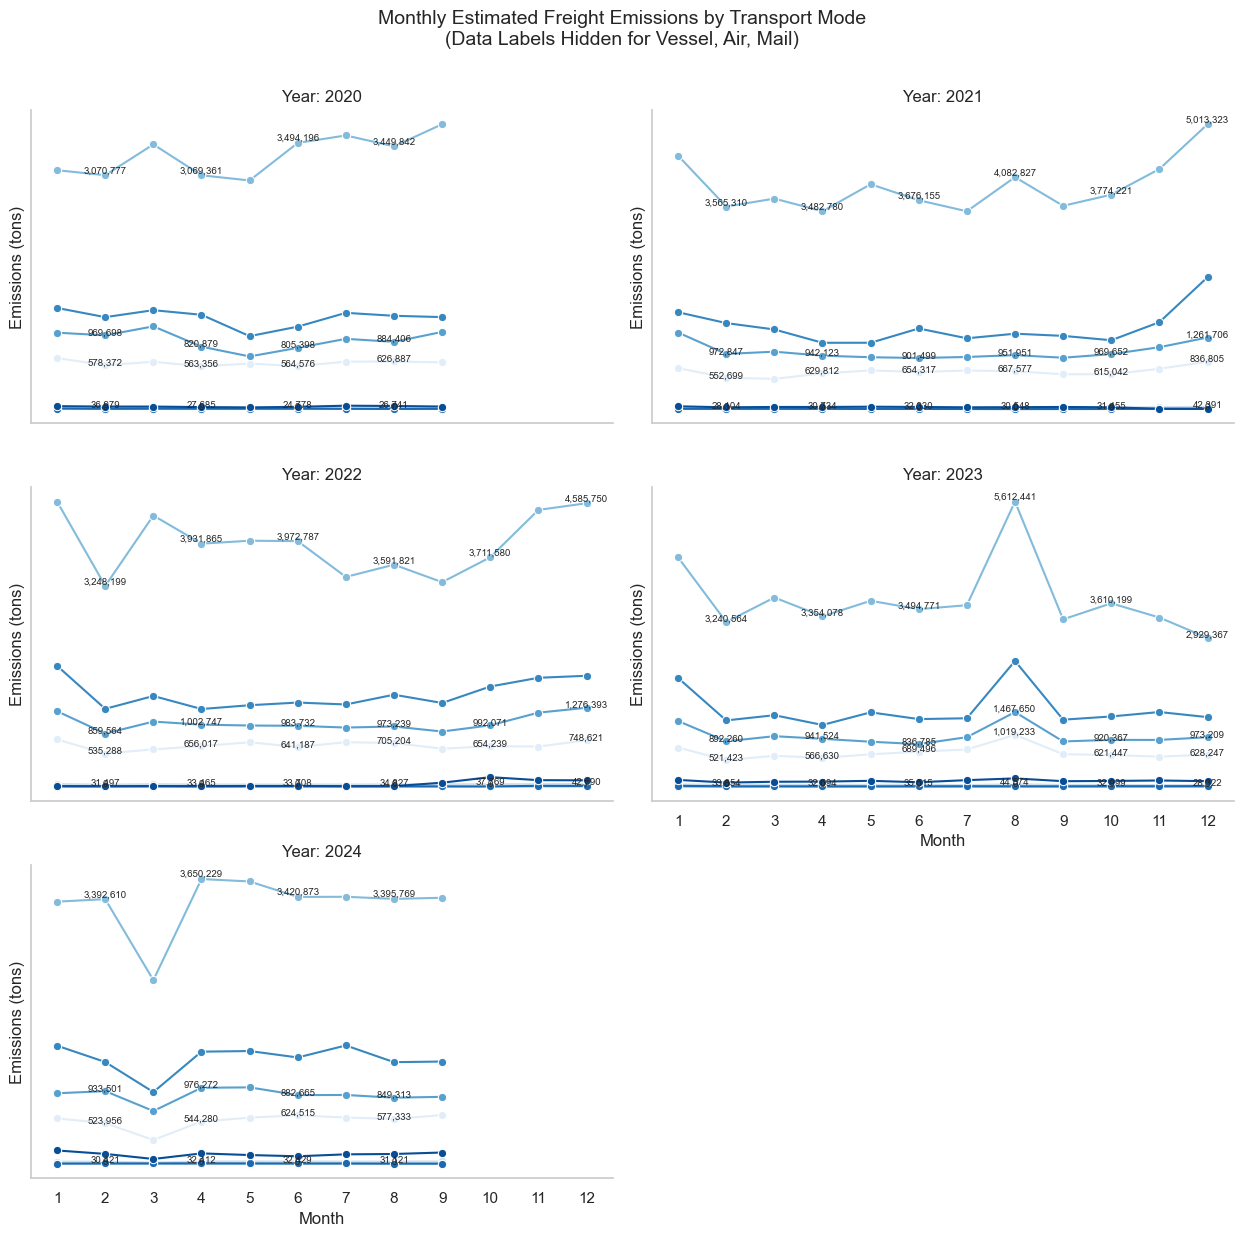

In [153]:

# Ensure emissions column is numeric
TFDA['EMISSIONS_TON'] = pd.to_numeric(TFDA['EMISSIONS_TON'], errors='coerce')

# Months to annotate
label_months = [2, 4, 6, 8, 10, 12]

# Group emissions data by year, month, and mode
yearly_emissions = TFDA.groupby(['YEAR', 'MONTH', 'DISAGMOT'])['EMISSIONS_TON'].sum().reset_index()

# Set up 2 charts per row
g = sns.FacetGrid(
    yearly_emissions,
    col='YEAR',
    col_wrap=2,
    height=4.2,
    aspect=1.5,
    sharey=False
)

# Blue color palette
unique_modes = yearly_emissions['DISAGMOT'].nunique()
blue_palette = sns.color_palette('Blues', n_colors=unique_modes)

# Plotting function
def draw_lineplot(data, **kwargs):
    ax = plt.gca()
    sns.lineplot(
        data=data,
        x='MONTH',
        y='EMISSIONS_TON',
        hue='DISAGMOT',
        marker='o',
        palette=blue_palette,
        ax=ax,
        legend=False
    )

    # Remove y-tick values and grid
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_ylabel("Emissions (tons)")
    ax.grid(False)
    ax.set_xlabel("Month")
    ax.set_xticks(range(1, 13))

    # Add data labels for top 6 months (excluding codes 9, 8, 7)
    subset = data[data['MONTH'].isin(label_months)]
    for _, row in subset.iterrows():
        if row['DISAGMOT'] not in [9, 8, 7]:  # Skip labels for Vessel, Air, Mail
            ax.text(
                row['MONTH'],
                row['EMISSIONS_TON'] + 0.01 * row['EMISSIONS_TON'],
                f"{int(row['EMISSIONS_TON']):,}",
                fontsize=7,
                ha='center'
            )

# Apply the plotting function
g.map_dataframe(draw_lineplot)

# Titles and layout
g.set_titles("Year: {col_name}")
g.fig.suptitle("Monthly Estimated Freight Emissions by Transport Mode\n(Data Labels Hidden for Vessel, Air, Mail)", fontsize=14)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.90)
plt.show()


**3. Which U.S. ports or border districts (DEPE) experience the highest freight volumes and costs?**

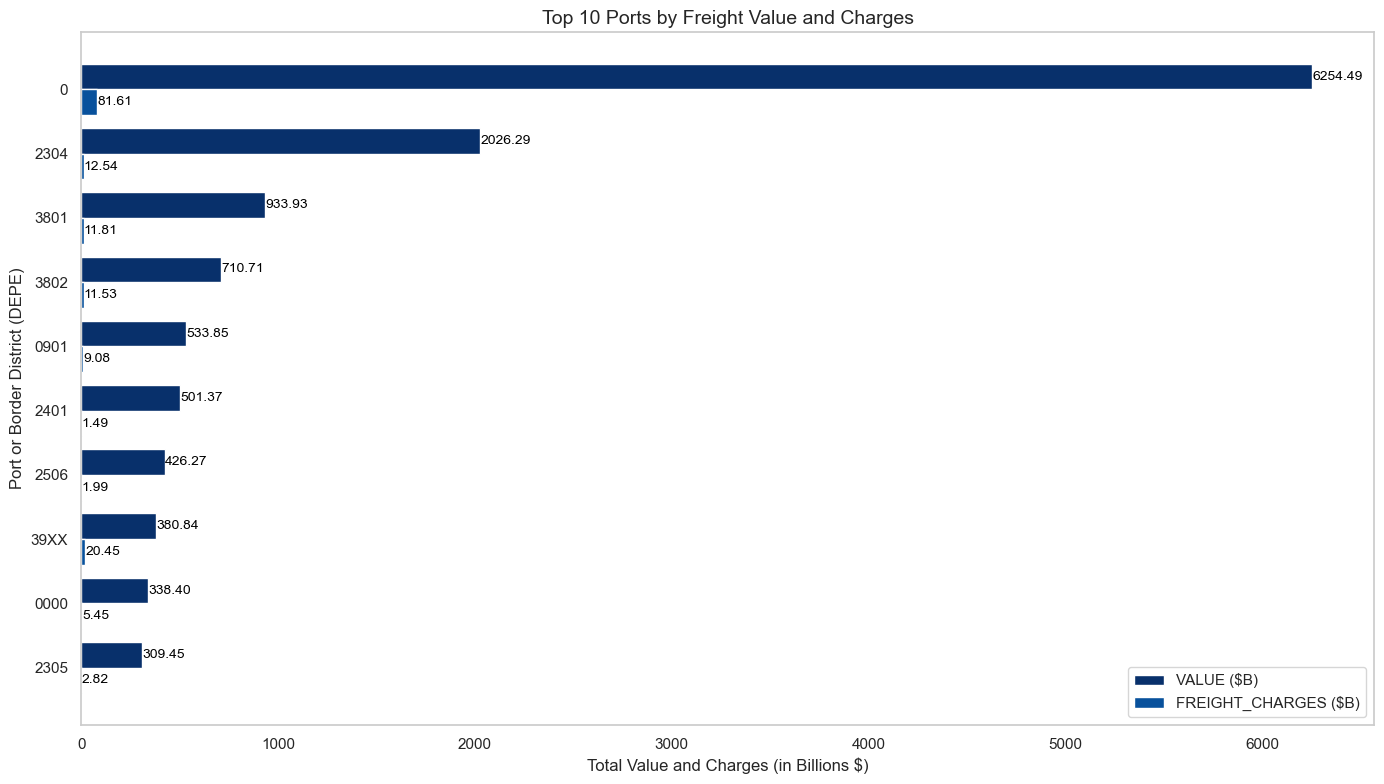

In [293]:
# Step 1: Aggregate and select top 10 ports by VALUE
port_summary = TFDA.groupby('DEPE')[['VALUE', 'FREIGHT_CHARGES']].sum()
port_summary = port_summary.sort_values('VALUE', ascending=False).head(10)

# Reverse for top-down bar display
port_summary = port_summary[::-1]

# Step 2: Create plot variables
bar_width = 0.4
index = range(len(port_summary))
labels = port_summary.index
value_data = port_summary['VALUE'] / 1e9  # convert to billions
charge_data = port_summary['FREIGHT_CHARGES'] / 1e9  # convert to billions

# Step 3: Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Bars
bars1 = ax.barh([i + bar_width for i in index], value_data, height=bar_width,
                label='VALUE ($B)', color='#08306b')
bars2 = ax.barh(index, charge_data, height=bar_width,
                label='FREIGHT_CHARGES ($B)', color='#08519c')

# Step 4: Add data labels
for bar in bars1:
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.2f}', va='center', fontsize=10, color='black')
for bar in bars2:
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.2f}', va='center', fontsize=10, color='black')

# Step 5: Customize plot
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(labels)
ax.set_xlabel('Total Value and Charges (in Billions $)', fontsize=12)
ax.set_ylabel('Port or Border District (DEPE)')
ax.set_title('Top 10 Ports by Freight Value and Charges', fontsize=14)
ax.legend()
ax.grid(False)

plt.tight_layout()
plt.show()

**4. Is there a correlation between freight volume (SHIPWT), value (VALUE), and emissions?**

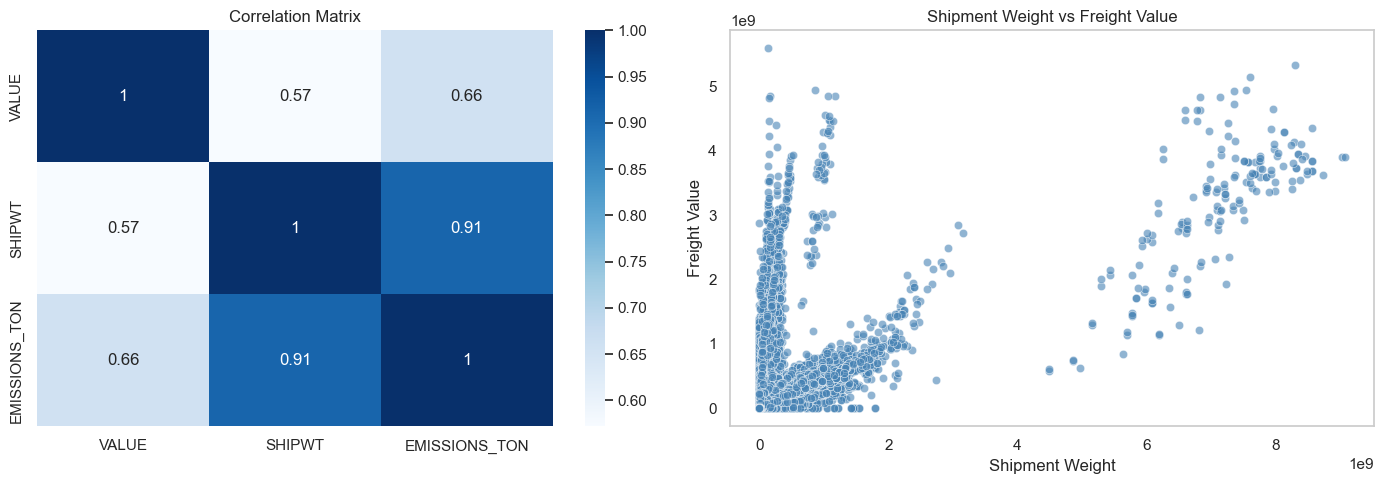

In [208]:
# Correlation analysis
corr = TFDA[['VALUE', 'SHIPWT', 'EMISSIONS_TON']].corr()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Correlation heatmap (Blues)
sns.heatmap(corr, annot=True, cmap='Blues', ax=axes[0])
axes[0].set_title('Correlation Matrix')

# Plot 2: Scatter plot of SHIPWT vs VALUE
sns.scatterplot(data=TFDA, x='SHIPWT', y='VALUE', ax=axes[1], color='steelblue', alpha=0.6)
axes[1].set_title('Shipment Weight vs Freight Value')
axes[1].set_xlabel('Shipment Weight')
axes[1].set_ylabel('Freight Value')

# Final layout
plt.tight_layout()
plt.grid(False)
plt.show()


**5. How does the use of containerisation (CONTCODE) affect freight efficiency and charges?**

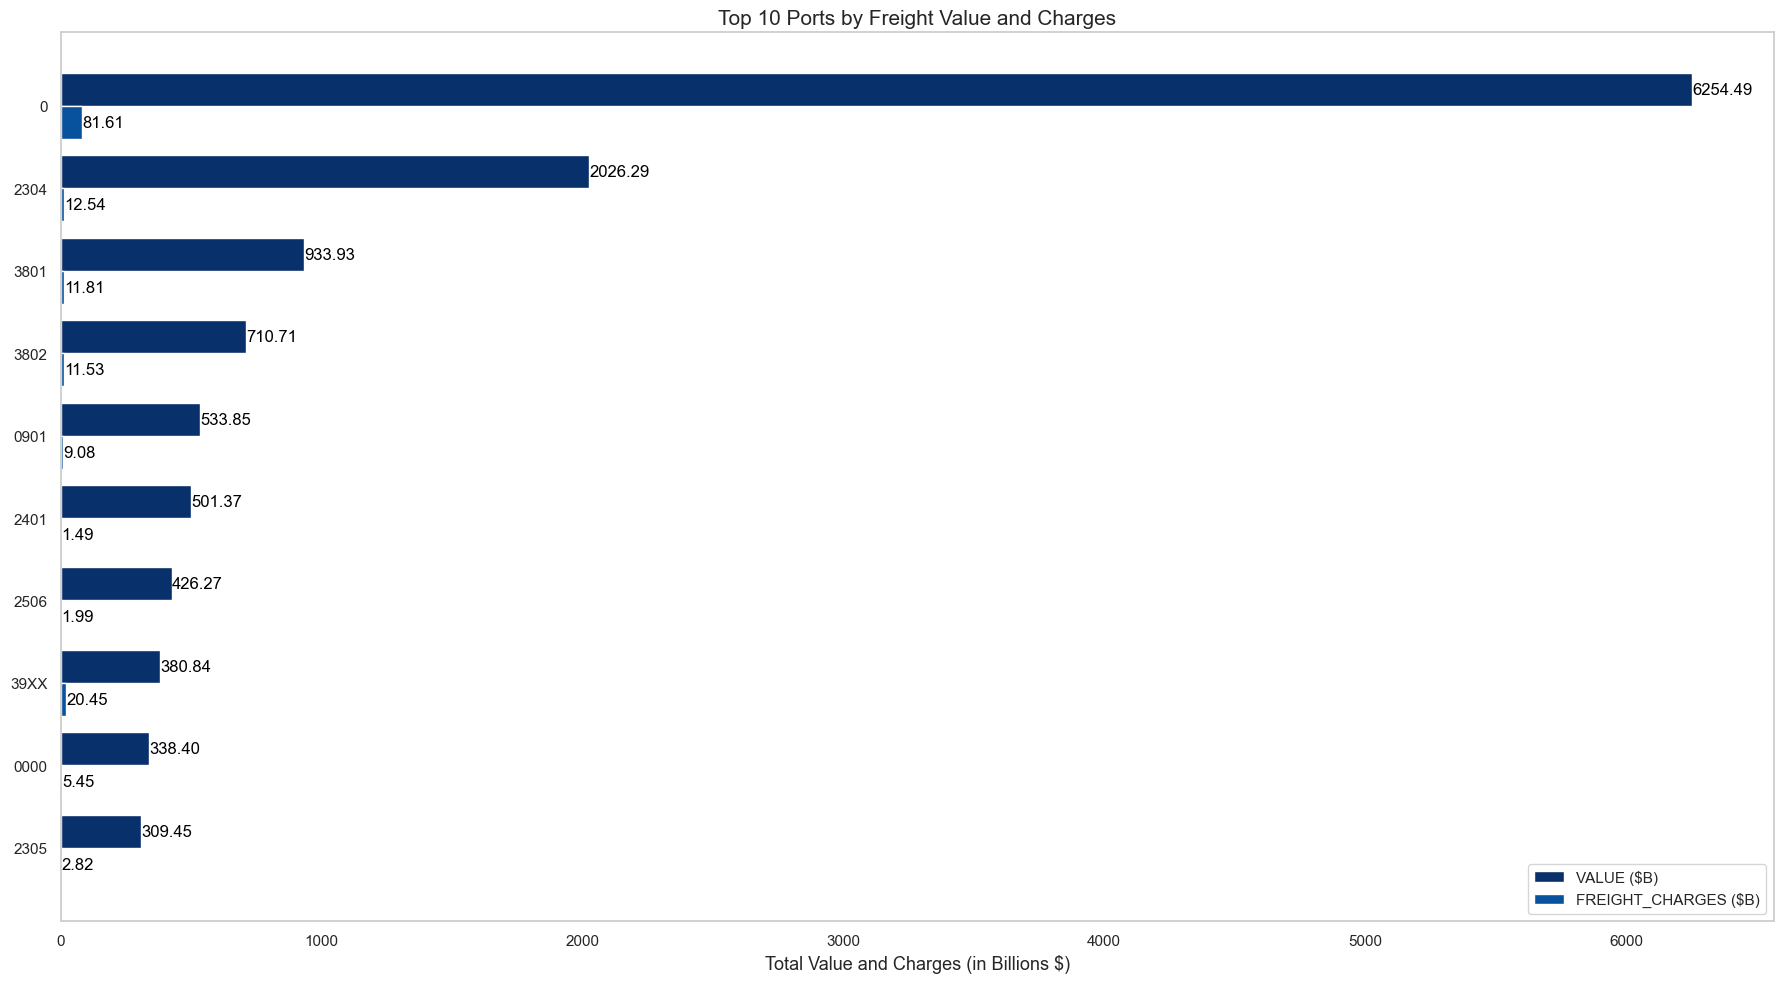

In [255]:
# Step 1: Aggregate and select top 10 ports by VALUE (sorted descending, reversed for barh)
port_summary = TFDA.groupby('DEPE')[['VALUE', 'FREIGHT_CHARGES']].sum()
port_summary = port_summary.sort_values('VALUE', ascending=False).head(10)
port_summary = port_summary[::-1]  # Reverse for top-to-bottom display in barh

# Step 2: Create plot variables
bar_width = 0.4
index = range(len(port_summary))
labels = port_summary.index
value_data = port_summary['VALUE'] / 1e9  # convert to billions
charge_data = port_summary['FREIGHT_CHARGES'] / 1e9

# Step 3: Plot with expanded figure size
fig, ax = plt.subplots(figsize=(18, 10))  # Increased width and height

# Bars
bars1 = ax.barh([i + bar_width for i in index], value_data, height=bar_width, label='VALUE ($B)', color='#08306b')
bars2 = ax.barh(index, charge_data, height=bar_width, label='FREIGHT_CHARGES ($B)', color='#08519c')

# Step 4: Add data labels with reduced font size
for bar in bars1:
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.2f}', va='center', fontsize=12, color='black')
for bar in bars2:
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.2f}', va='center', fontsize=12, color='black')

# Step 5: Customize plot
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(labels)
ax.set_xlabel('Total Value and Charges (in Billions $)', fontsize=13)
ax.set_title('Top 10 Ports by Freight Value and Charges', fontsize=15)
ax.legend()
ax.grid(False)

plt.tight_layout()
plt.show()

**6. Which commodities (COMMODITY2) and transport mode contribute most to CO2 emissions?**

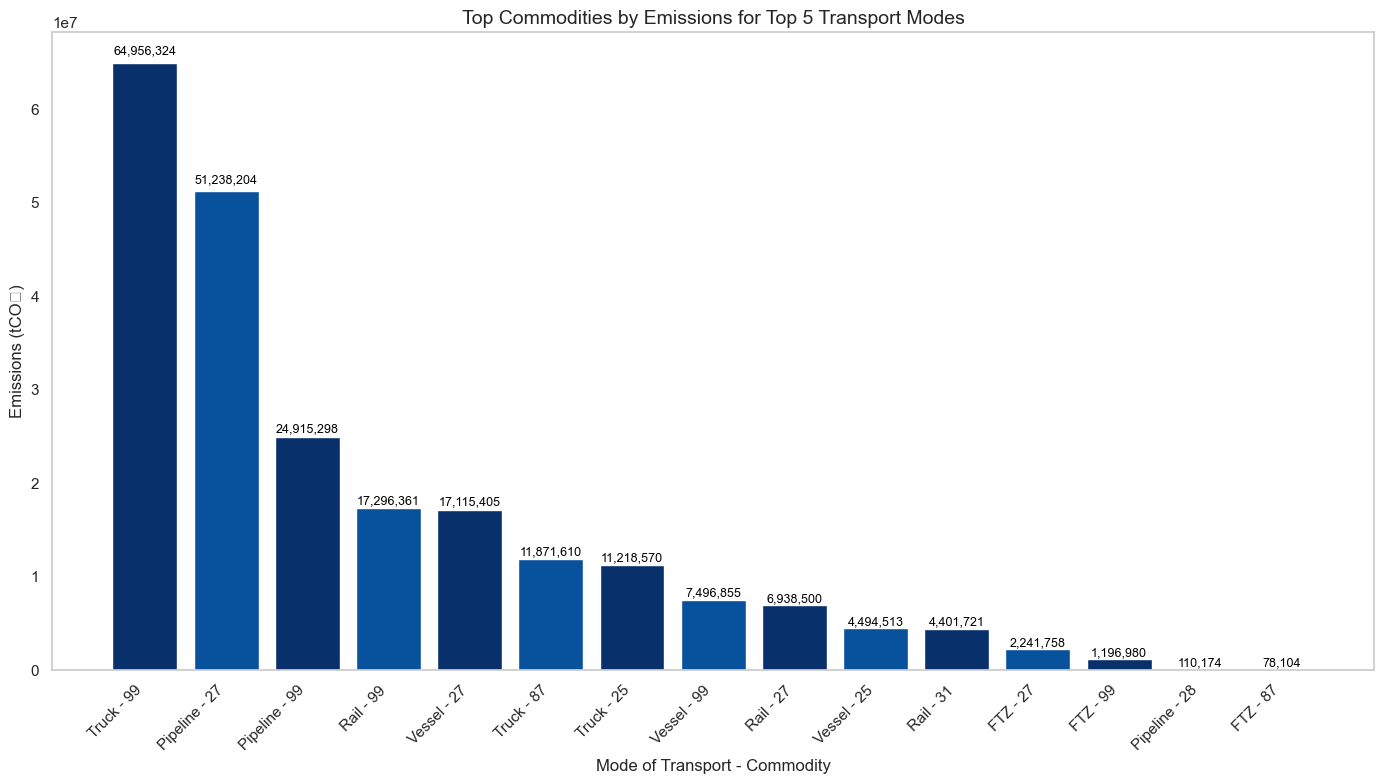

In [257]:
# Step 6: Plot
fig, ax = plt.subplots(figsize=(14, 8))
colors = ['#08306b', '#08519c'] * (len(top_commodities) // 2 + 1)

# Convert Mode and COMMODITY2 to strings
x_labels = top_commodities['Mode'].astype(str) + " - " + top_commodities['COMMODITY2'].astype(str)

bars = ax.bar(
    x_labels,
    top_commodities['EMISSIONS_TON'],
    color=colors[:len(top_commodities)]
)

# Step 7: Add data labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + height * 0.01,
            f'{height:,.0f}', ha='center', va='bottom', fontsize=9, color='black')

# Step 8: Customize
ax.set_title('Top Commodities by Emissions for Top 5 Transport Modes', fontsize=14)
ax.set_ylabel('Emissions (tCO₂)', fontsize=12)
ax.set_xlabel('Mode of Transport - Commodity', fontsize=12)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.grid(False)

plt.tight_layout()
plt.show()


**7. How do seasonal patterns affect freight movement efficiency and environmental outcomes?**

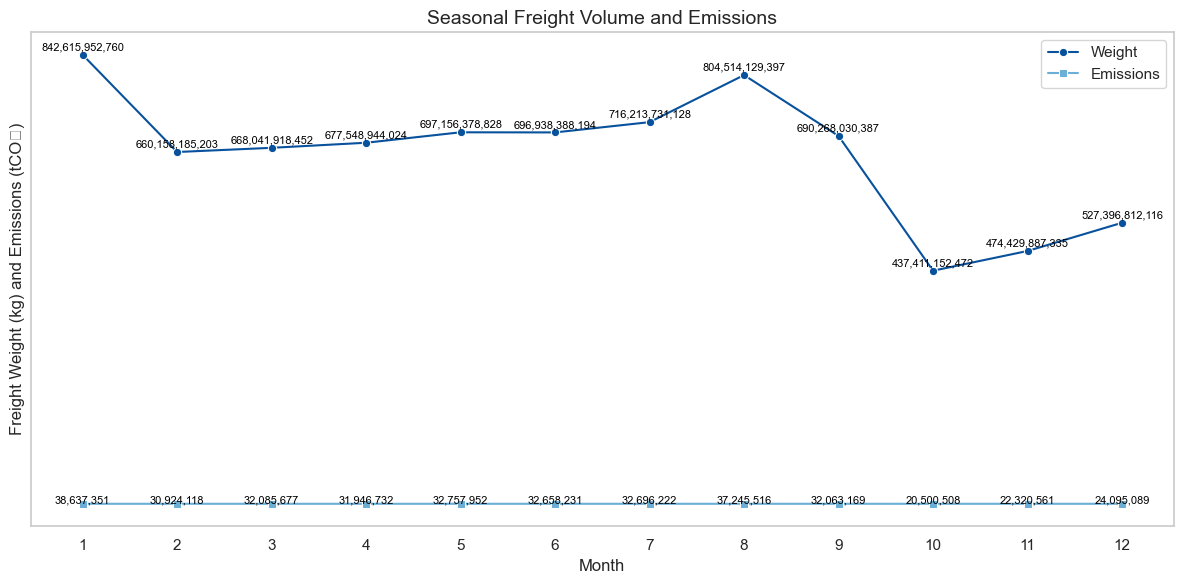

In [269]:
# Group data seasonally
seasonal = TFDA.groupby('MONTH')[['SHIPWT', 'EMISSIONS_TON']].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))

# Plot SHIPWT line
sns.lineplot(
    data=seasonal, x='MONTH', y='SHIPWT',
    label='Weight', marker='o', color='#08519c'
)

# Plot EMISSIONS_TON line
sns.lineplot(
    data=seasonal, x='MONTH', y='EMISSIONS_TON',
    label='Emissions', marker='s', color='#6baed6'
)

# Add data labels
for i in range(len(seasonal)):
    plt.text(seasonal['MONTH'][i], seasonal['SHIPWT'][i] + seasonal['SHIPWT'].max() * 0.01,
             f"{seasonal['SHIPWT'][i]:,.0f}", ha='center', fontsize=8, color='black')
    plt.text(seasonal['MONTH'][i], seasonal['EMISSIONS_TON'][i] + seasonal['EMISSIONS_TON'].max() * 0.01,
             f"{seasonal['EMISSIONS_TON'][i]:,.0f}", ha='center', fontsize=8, color='black')

# Style
plt.title('Seasonal Freight Volume and Emissions', fontsize=14)
plt.ylabel('Freight Weight (kg) and Emissions (tCO₂)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(range(1, 13))
plt.yticks([])  # Remove y-tick labels
plt.grid(False)

plt.tight_layout()
plt.show()
